# SI 618 - Homework #6: Machine Learning 1

Version 2024.03.20.2.CT

In this homework exercise you will apply the machine learning techniques we've covered so far: 
machine learning pipelines, dimension reduction, and clustering.

You will be using the [customer personality analysis dataset](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis) from Kaggle.

**NOTE:** This is a fairly involved homework assignment and we *strongly* urge you to not leave this to the last minute.
We suggest that you try to work on this assignment over several days.

A reminder (from the syllabus):
> Unless stated otherwise in an assignment, you are permitted to use generative AI (e.g. ChatGPT, Copilot, etc.) but you must indicate  that you did so in the work that you submit.  **If you fail to 
>  disclose your use of generative AI you will receive a grade of
> zero on the assignment**.

### The total score for this assignment will be 100 points, consisting of:
- 10 pt: Overall quality of spelling, grammar, punctuation, etc. of written sentences. ([Guide](https://drive.google.com/file/d/1L0P7xJwjUGBvyb49mL3dw1Bt7hzRTiTl/view ))
- 10 pt: Code is written in [PEP 8](https://www.python.org/dev/peps/pep-0008/) style.
- 80 pt: Homework questions. 

## Task 1 (10 points):
Perform exploratory data analyses on the variables in this dataset.  Your work should include both
numerical **and** graphical overviews of the data.  Explain your findings.  

In [571]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model as lm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.manifold import TSNE


In [572]:
marketing = pd.read_csv('marketing_campaign.csv', sep='\t')

In [573]:
marketing.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [574]:
marketing.shape

(2240, 29)

In [575]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [576]:
marketing.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [577]:
marketing.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      2240.000000  ...        2240.000000   2240.000000   2240.000000   
mean         37.525446  ...           5.316518      0.072768      0.074554   
std          54.628979  ...           2.426645      0.259813      0.262728   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%           3.000000  ...           3.000000      0.000000      0.000000   
50%          12.000000  ...           6.000000      0.000000      0.000000   
75%          50.000000  ...           7.000000      0.000000      0.000000   
max         259.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2240.000000   2240.000000   2240.000000  2240.000000         2240.0   
mean       0.072768      0.064286      0.013393     0.009375            3.0   
std        0.259813      0.245316      0.114976     0.096391            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue     Response  
count     2240.0  2240.000000  
mean        11.0     0.149107  
std          0.0     0.356274  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  

[8 rows x 26 columns]

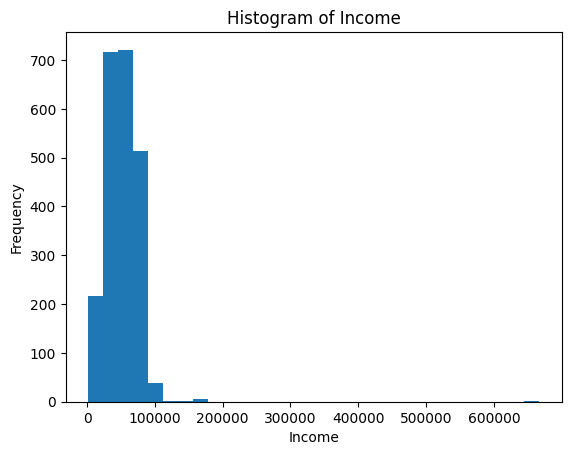

In [578]:
plt.hist(marketing['Income'], bins=30)
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Histogram of Income')
plt.show()

In [579]:
marketing_without_outliers = marketing[marketing['Income'] < 600000]

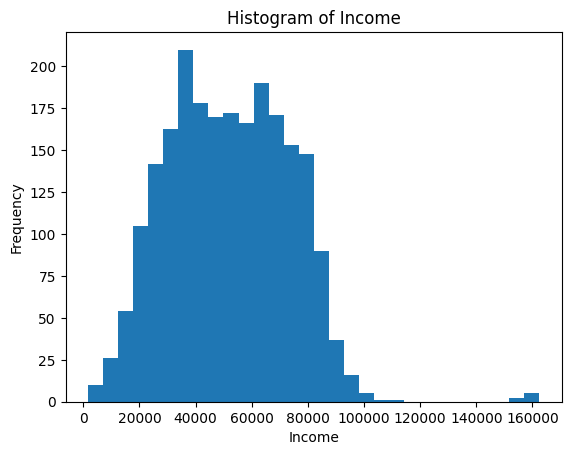

In [580]:
plt.hist(marketing_without_outliers['Income'], bins=30)
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Histogram of Income')
plt.show()

In [581]:
marketing.sort_values(by='Income', ascending=False)

ID  Year_Birth   Education Marital_Status    Income  Kidhome  \
2233   9432        1977  Graduation       Together  666666.0        1   
617    1503        1976         PhD       Together  162397.0        1   
687    1501        1982         PhD        Married  160803.0        0   
1300   5336        1971      Master       Together  157733.0        1   
164    8475        1973         PhD        Married  157243.0        0   
...     ...         ...         ...            ...       ...      ...   
2078   5079        1971  Graduation        Married       NaN        1   
2079  10339        1954      Master       Together       NaN        0   
2081   3117        1955  Graduation         Single       NaN        0   
2084   5250        1943      Master          Widow       NaN        0   
2228   8720        1978    2n Cycle       Together       NaN        0   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
2233         0  02-06-2013       23         9  ...                  6   
617          1  03-06-2013       31        85  ...                  1   
687          0  04-08-2012       21        55  ...                  0   
1300         0  04-06-2013       37        39  ...                  1   
164          1  01-03-2014       98        20  ...                  0   
...        ...         ...      ...       ...  ...                ...   
2078         1  03-03-2013       82        71  ...                  8   
2079         1  23-06-2013       83       161  ...                  6   
2081         1  18-10-2013       95       264  ...                  7   
2084         0  30-10-2013       75       532  ...                  1   
2228         0  12-08-2012       53        32  ...                  0   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
2233             0             0             0             0             0   
617              0             0             0             0             0   
687              0             0             0             0             0   
1300             0             0             0             0             0   
164              0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2078             0             0             0             0             0   
2079             0             0             0             0             0   
2081             0             0             0             0             0   
2084             0             0             1             0             0   
2228             0             1             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
2233         0              3         11         0  
617          0              3         11         0  
687          0              3         11         0  
1300         0              3         11         0  
164          0              3         11         0  
...        ...            ...        ...       ...  
2078         0              3         11         0  
2079         0              3         11         0  
2081         0              3         11         0  
2084         0              3         11         1  
2228         0              3         11         0  

[2240 rows x 29 columns]

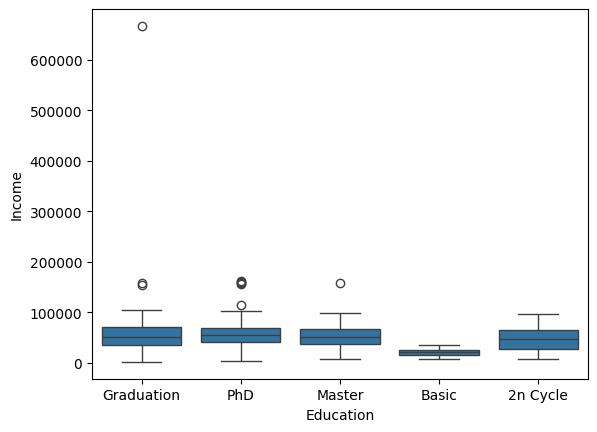

In [582]:
sns.boxplot(x='Education', y='Income', data=marketing)
plt.show()

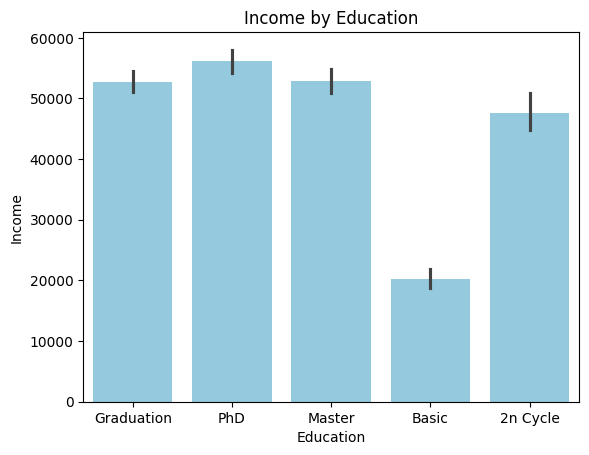

In [583]:
sns.barplot(x='Education', y='Income', data=marketing, color='skyblue')
plt.title('Income by Education')
plt.show()

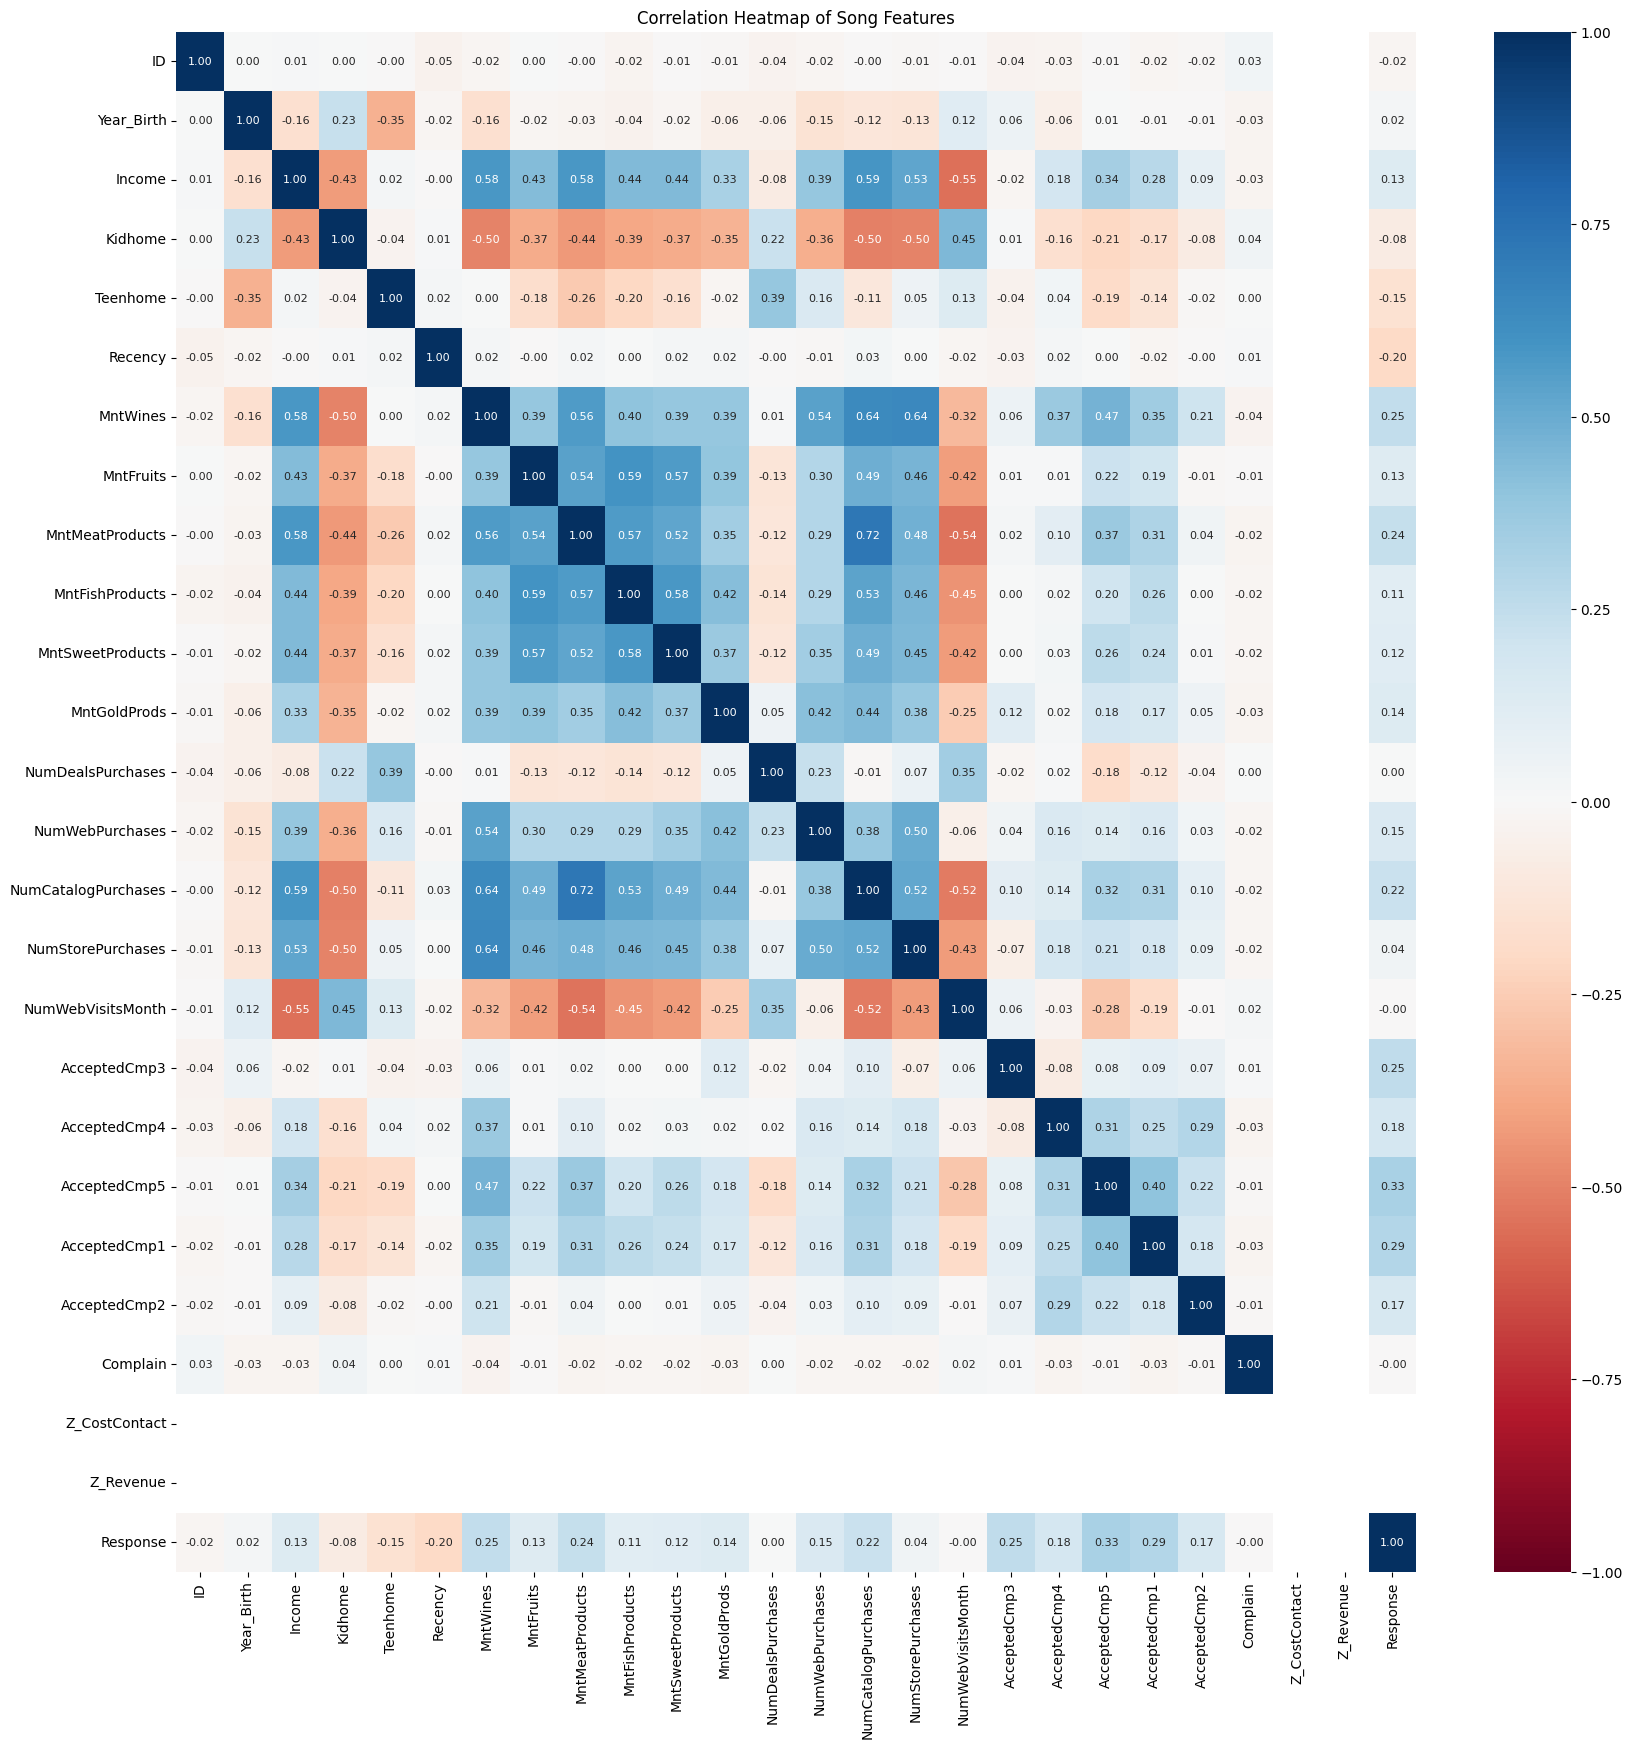

In [584]:
plt.figure(figsize=(20, 20))
sns.heatmap(marketing.corr(numeric_only=True),cmap="RdBu",vmax=1,vmin=-1,annot=True, fmt=".2f", annot_kws={"size": 8})
plt.title('Correlation Heatmap of Song Features')
plt.show()

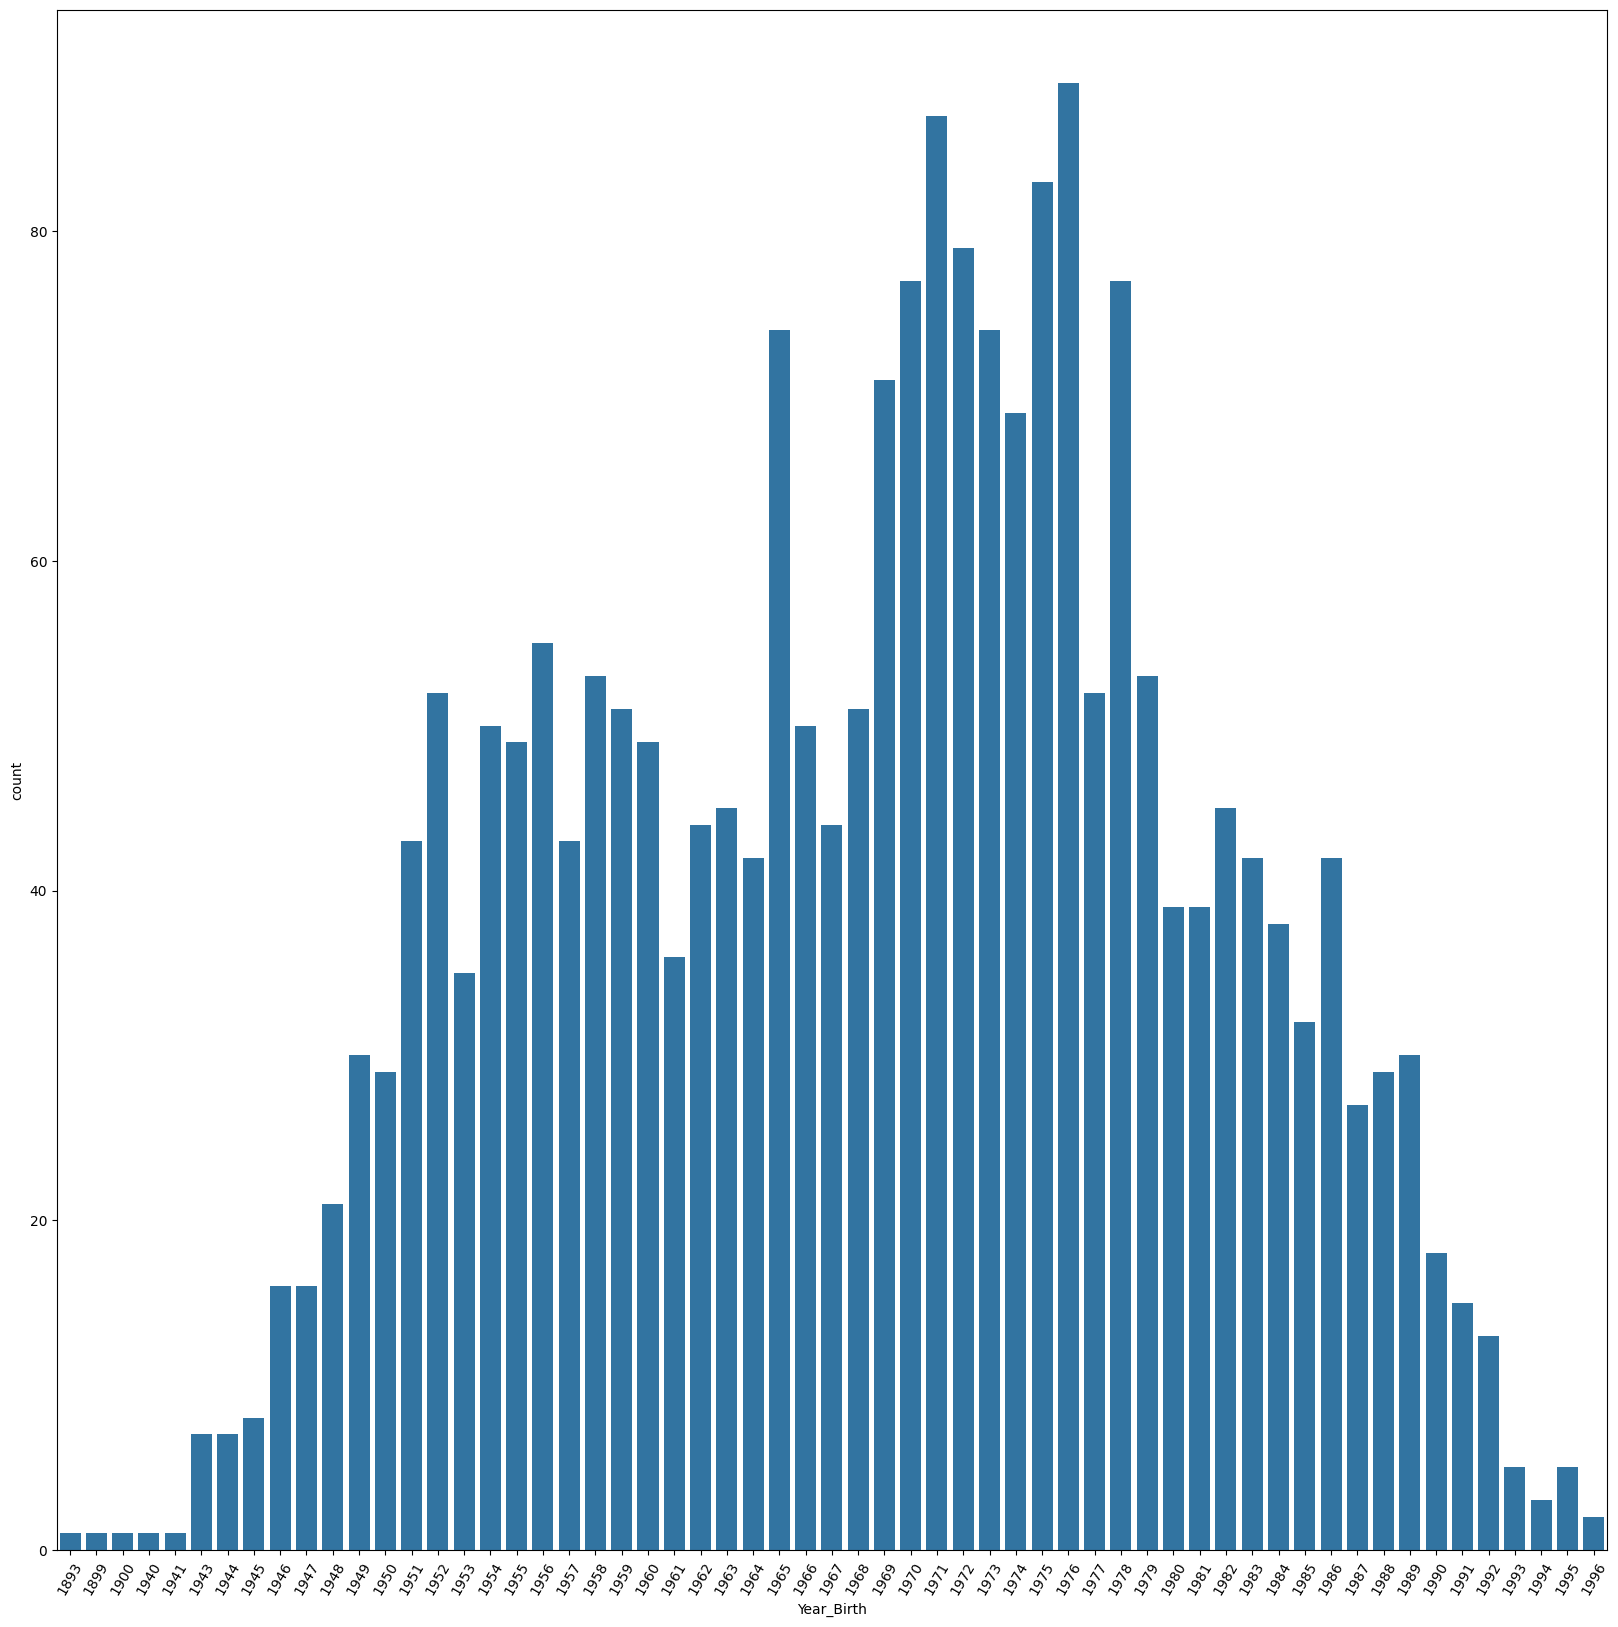

In [585]:
plt.figure(figsize=(20, 20))
sns.countplot(x='Year_Birth', data=marketing)
xticks = plt.xticks(rotation=60)

<Axes: xlabel='Education', ylabel='count'>

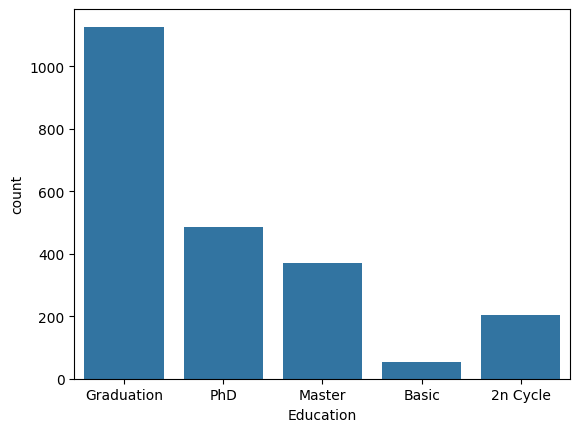

In [586]:
sns.countplot(x='Education', data=marketing)

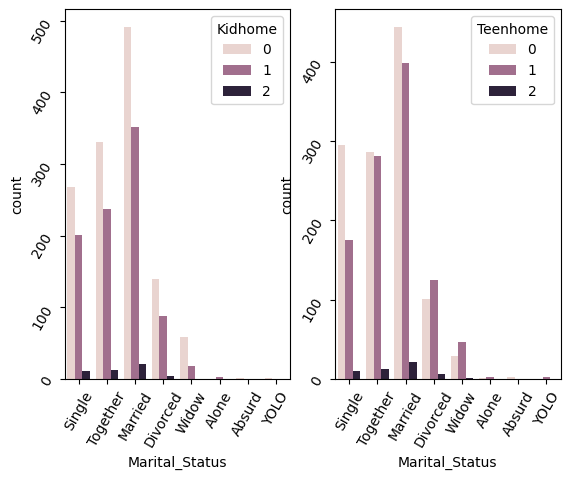

In [587]:
fig, ax = plt.subplots(1,2)
sns.countplot(data=marketing, x='Marital_Status', hue='Kidhome', ax=ax[0])
sns.countplot(data=marketing, x='Marital_Status', hue='Teenhome', ax=ax[1])
ax[0].tick_params(rotation=60)
ax[1].tick_params(rotation=60)
plt.show()

<Axes: xlabel='Response', ylabel='count'>

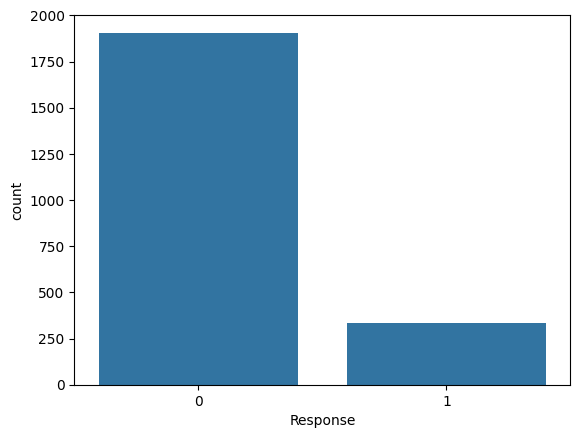

In [588]:
sns.countplot(data=marketing, x='Response')

<Axes: xlabel='Marital_Status', ylabel='Recency'>

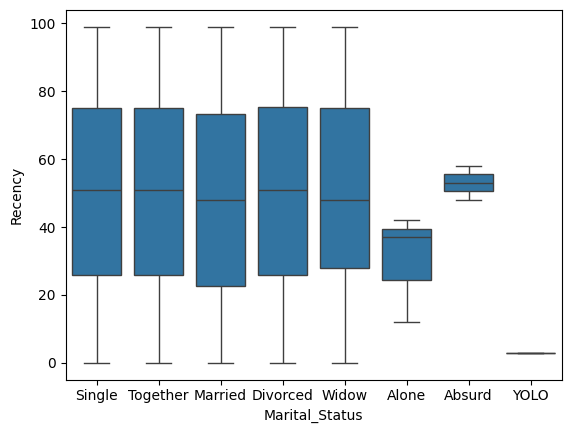

In [589]:
sns.boxplot(data=marketing, x='Marital_Status', y='Recency')

In [590]:
marketing.pivot_table(index='Marital_Status', columns='Response', values='Recency', aggfunc='mean')

Response                0          1
Marital_Status                      
Absurd          48.000000  58.000000
Alone           27.000000  37.000000
Divorced        51.750000  40.812500
Married         49.960836  35.122449
Single          53.802139  34.349057
Together        52.288462  31.200000
Widow           51.344828  42.421053
YOLO             3.000000   3.000000

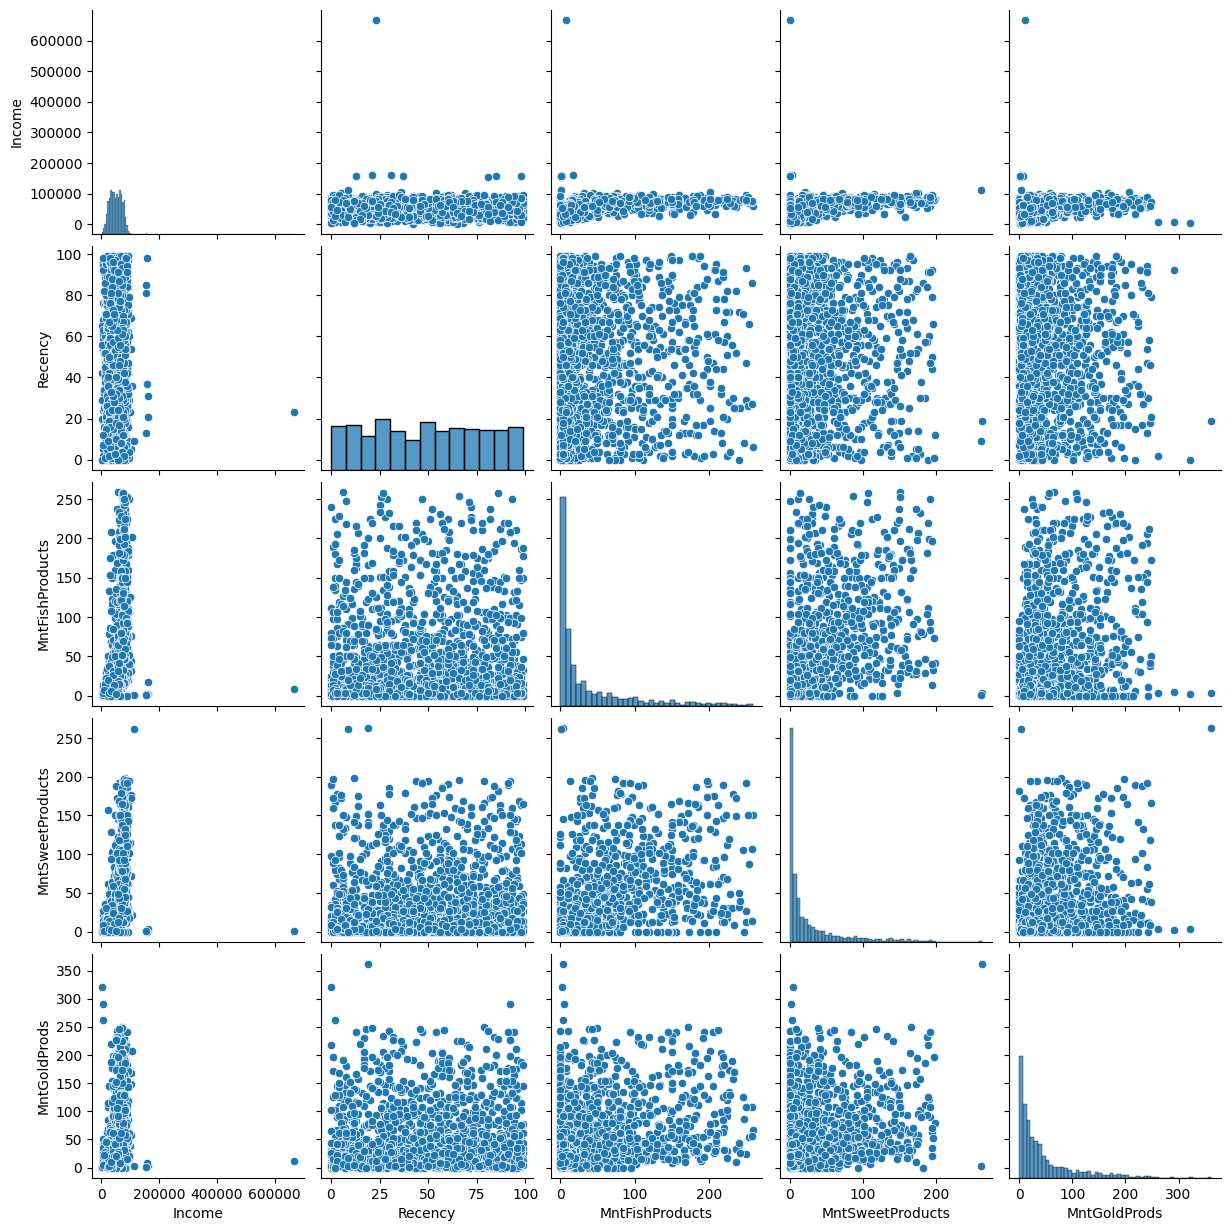

In [591]:
sns.pairplot(marketing[['Income', 'Recency', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']])


1) Only the column Income has null values, the data looks clean. It is also observed that Z_CostContact and Z_Revenue are constant throughout the data.
2) The histogram of income is approximately normal, but it has one extreme value point. which can possibly be an outlier.
3) The row with ID 9432 has an income that is extremely high in comparison to the income throughout the data.
4) The box plot of education shows that the income level of the basic level population is lower in comparison to the others. This can be observed, as we can see that a lack of education most of the time leads to low income.
5) There seems to be some moderately positive correlation between income and variables like MntWines, indicating that higher income might be associated with spending more on wines.
6) The number of web purchases (NumWebPurchases) seems to have a moderately positive correlation with income, perhaps indicating that higher-income individuals may be more inclined to make purchases online.
7) It is observed that the year of birth is normally distributed.
8) The number of graduates is high in comparison to PHD, Masters, basic, and 2N cycles. This is generally observed because most people do not choose post graduation.
9) If the person is divorced, there is a higher chance that the person has a teenage child. Most people do not have kids or teen age kids.
10) The response categories show a class imbalance, with more 0 responses in comparison to 1.
11)  If the person is alone, they buy stuff more frequently. Also, most of the alone people are young and probably go out shopping more frequently.
12) A single customer is more likely to accept the promotion, as they might try to save as much money as they can. This may be because the alone customers are usually young.
13) The recency variable doesn't appear to have a strong relationship with spending amounts, suggesting that the timing of the last purchase might not necessarily affect how much is spent.

## Task 2 (1 point): Drop all columns that have constant values.

In [592]:
marketing.nunique() 

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [593]:
# insert your code here
def is_constant(column):
    return len(column.unique()) == 1

In [594]:
marketing.apply(is_constant)

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                 False
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact           True
Z_Revenue               True
Response               False
dtype: bool

In [595]:
marketing.drop(columns=['Z_CostContact', 'Z_Revenue'], inplace=True)

## Task 3 (1 point):
Create a new variable `In_Relationship` whose value is 1 if the value of `Marital_Status` is "Married" or "Together" and 0 otherwise.  Drop the `Marital_Status` column.

In [596]:
# insert your code here
def In_Relationship(x):
    if x in ['Married', 'Together']:
        return 1
    else:
        return 0

In [597]:
marketing['In_Relationship'] = marketing['Marital_Status'].apply(In_Relationship)

In [598]:
marketing[['In_Relationship','Marital_Status']].value_counts()

In_Relationship  Marital_Status
1                Married           864
                 Together          580
0                Single            480
                 Divorced          232
                 Widow              77
                 Alone               3
                 Absurd              2
                 YOLO                2
Name: count, dtype: int64

In [599]:
marketing.drop(columns=['Marital_Status'], inplace=True)

By dropping the Marital_Status and creating a variable that indicates if the customer is together or married, This generalizes the data and also reduces the possibility of an increase in the dimentionality for future analysis.

## Task 4 (3 points):
Impute missing income values with the median income.  Explain your results (i.e. what the median value was, how many values were imputed, how reliable you think the median value is, etc.).

In [600]:
# Insert your code here
marketing[marketing['Income'].isna()]

ID  Year_Birth   Education  Income  Kidhome  Teenhome Dt_Customer  \
10     1994        1983  Graduation     NaN        1         0  15-11-2013   
27     5255        1986  Graduation     NaN        1         0  20-02-2013   
43     7281        1959         PhD     NaN        0         0  05-11-2013   
48     7244        1951  Graduation     NaN        2         1  01-01-2014   
58     8557        1982  Graduation     NaN        1         0  17-06-2013   
71    10629        1973    2n Cycle     NaN        1         0  14-09-2012   
90     8996        1957         PhD     NaN        2         1  19-11-2012   
91     9235        1957  Graduation     NaN        1         1  27-05-2014   
92     5798        1973      Master     NaN        0         0  23-11-2013   
128    8268        1961         PhD     NaN        0         1  11-07-2013   
133    1295        1963  Graduation     NaN        0         1  11-08-2013   
312    2437        1989  Graduation     NaN        0         0  03-06-2013   
319    2863        1970  Graduation     NaN        1         2  23-08-2013   
1379  10475        1970      Master     NaN        0         1  01-04-2013   
1382   2902        1958  Graduation     NaN        1         1  03-09-2012   
1383   4345        1964    2n Cycle     NaN        1         1  12-01-2014   
1386   3769        1972         PhD     NaN        1         0  02-03-2014   
2059   7187        1969      Master     NaN        1         1  18-05-2013   
2061   1612        1981         PhD     NaN        1         0  31-05-2013   
2078   5079        1971  Graduation     NaN        1         1  03-03-2013   
2079  10339        1954      Master     NaN        0         1  23-06-2013   
2081   3117        1955  Graduation     NaN        0         1  18-10-2013   
2084   5250        1943      Master     NaN        0         0  30-10-2013   
2228   8720        1978    2n Cycle     NaN        0         0  12-08-2012   

      Recency  MntWines  MntFruits  ...  NumStorePurchases  NumWebVisitsMonth  \
10         11         5          5  ...                  2                  7   
27         19         5          1  ...                  0                  1   
43         80        81         11  ...                  4                  2   
48         96        48          5  ...                  4                  6   
58         57        11          3  ...                  3                  6   
71         25        25          3  ...                  3                  8   
90          4       230         42  ...                  8                  9   
91         45         7          0  ...                  2                  7   
92         87       445         37  ...                  8                  1   
128        23       352          0  ...                  7                  6   
133        96       231         65  ...                  7                  4   
312        69       861        138  ...                 12                  3   
319        67       738         20  ...                 10                  7   
1379       39       187          5  ...                  6                  5   
1382       87        19          4  ...                  3                  5   
1383       49         5          1  ...                  2                  7   
1386       17        25          1  ...                  3                  7   
2059       52       375         42  ...                  4                  3   
2061       82        23          0  ...                  3                  6   
2078       82        71          1  ...                  3                  8   
2079       83       161          0  ...                  4                  6   
2081       95       264          0  ...                  5                  7   
2084       75       532        126  ...                 11                  1   
2228       53        32          2  ...                  1                  0   

      AcceptedCmp3  AcceptedCmp4

In [601]:
marketing['Income'].median()

51381.5

In [602]:
marketing.groupby(['Education'])['Income'].median()

Education
2n Cycle      46805.0
Basic         20744.0
Graduation    52028.5
Master        50943.0
PhD           55212.0
Name: Income, dtype: float64

In [603]:
marketing['Income'].fillna(marketing['Income'].median(), inplace=True)

The missing values do not have any category of basic, which have a very low median income, whereas all the other categories have similar income levels, and the median income is also comparable to the median income of these categories. Hence, filling in the median value of the income seems to be a reliable solution to these missing values.

## Task 5 (15 points):
Use scikit-learn to conduct a linear regression that models the amount spend on wine (`MntWines`) based on `Income` and whether they are in a relationship (`In_Relationship`).  Assess how good your model is by reporting the root mean squared error (RMSE) using the test dataset from an 80-20 train-test-split of the original dataset.  Explain what your value of RMSE means, and comment on how good you think your model is based on the RMSE value means.

In [604]:
# insert your code here
X = marketing[['Income', 'In_Relationship']]
y = marketing['MntWines']

In [605]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [606]:
lm_model = lm.LinearRegression()
lm_model.fit(X_train, y_train)

LinearRegression()

In [607]:
y_pred = lm_model.predict(X_test)
RMSE =np.sqrt(mean_squared_error(y_test, y_pred))
print(f"The RMSE is: {RMSE}")

The RMSE is: 263.61704688252837


The average amount spent on wine is 303.935714, with a standard deviation of 336.597393. The RMSE is 263.61, which shows that on average, the model is wrong by this amount. The model is not a great model based on the RMSE value. The model does capture the general trends, but it is not very precise. Its predictions deviate from the actual values by a considerable margin on average.

## Task 6 (20 points):
Conduct an agglomerative clustering analysis to find 3 clusters using average linkage based on PCA projections of the original data onto 4 dimensions (use one-hot encoding on your categorical variables, and remember to scale your data before doing the PCA).  Report the percentage of variance retained in the first 4 principal components. 

Do not create a dendrogram. Instead, create a scatterplot of the first two principal components, colored by cluster membership.  Comment on the results of your clustering analysis.

Repeat the above steps using 5 clusters.  Compare the results to the 3 cluster solution.  Which solution do you prefer and why?

Keep in mind that one of the goals of cluster analysis with this dataset is creating customer segments.  Can you define customer segments by examining the characteristics of each cluster? (Hint: a groupby() by cluster membership might be helpful here.)

In [608]:
marketing.dtypes

ID                       int64
Year_Birth               int64
Education               object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Response                 int64
In_Relationship          int64
dtype: object

In [609]:
categorical_features = ['Education']
numerical_features = marketing.columns.drop(['ID', 'Dt_Customer','Education'])

numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ])

In [610]:
pca = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=4, random_state=42))
])

X_pca = pca.fit_transform(marketing)

In [611]:
X_pca

array([[ 3.78644567, -0.16661412, -0.27346352,  2.3702691 ],
       [-2.35270454,  0.1494097 , -0.15025571, -0.7652725 ],
       [ 1.61704907,  0.13711724, -1.10942812, -0.14772681],
       ...,
       [ 1.49541485, -0.09679004,  0.99405749, -1.77058464],
       [ 1.73818229,  1.40366899, -0.99034385, -0.49422337],
       [-1.68613434,  0.72546612,  1.17933782,  0.35361986]])

In [612]:
explain_variance = pca.named_steps.pca.explained_variance_ratio_
explain_variance

array([0.26423639, 0.08230768, 0.07705342, 0.05745679])

In [613]:
percentage_variance = np.sum(explain_variance) * 100

In [614]:
print(f'The percentage of variance explained by the 4 components is: {percentage_variance:.3f}%')

The percentage of variance explained by the 4 components is: 48.105%


In [615]:
cluster_model_3 = AgglomerativeClustering(n_clusters=3, linkage='average')
cluster_model_3.fit(X_pca)

AgglomerativeClustering(linkage='average', n_clusters=3)

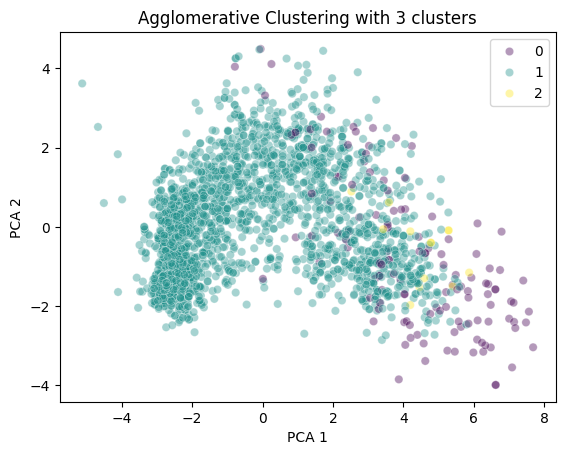

In [616]:
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cluster_model_3.labels_, palette='viridis', legend='full', alpha=0.4)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Agglomerative Clustering with 3 clusters')
plt.show()

In [617]:
cluster_model_5 = AgglomerativeClustering(n_clusters=5, linkage='average')
cluster_model_5.fit(X_pca)

AgglomerativeClustering(linkage='average', n_clusters=5)

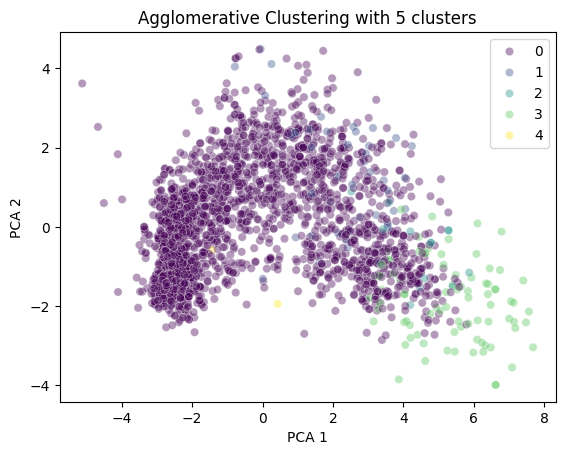

In [618]:
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cluster_model_5.labels_, palette='viridis', legend='full', alpha=0.4)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Agglomerative Clustering with 5 clusters')
plt.show()

In [619]:
marketing['Cluster_3'] = cluster_model_3.labels_


In [620]:
for column in marketing.columns:
    if column != 'Cluster_3':
        print(f"Statistics for {column} by Cluster_3:")
        print(marketing[[column, 'Cluster_3']].groupby('Cluster_3').describe().T)
        print("\n")

Statistics for ID by Cluster_3:
Cluster_3             0             1            2
ID count     128.000000   2099.000000    13.000000
   mean     5547.257812   5603.056694  4274.846154
   std      3181.585204   3254.483036  2431.759886
   min         1.000000      0.000000  1509.000000
   25%      2821.250000   2828.500000  3009.000000
   50%      5495.500000   5493.000000  3483.000000
   75%      8197.750000   8435.500000  5067.000000
   max     10972.000000  11191.000000  9757.000000


Statistics for Year_Birth by Cluster_3:
Cluster_3                   0            1            2
Year_Birth count   128.000000  2099.000000    13.000000
           mean   1969.656250  1968.774178  1965.538462
           std      13.781442    11.872073    11.184926
           min    1946.000000  1893.000000  1954.000000
           25%    1956.000000  1959.000000  1958.000000
           50%    1970.500000  1970.000000  1961.000000
           75%    1981.250000  1977.000000  1972.000000
           max    1

In [621]:
marketing['Cluster_5'] = cluster_model_5.labels_
marketing.drop(columns=['Cluster_3'], inplace=True)

In [622]:
for column in marketing.columns:
    if column != 'Cluster_5':
        print(f"Statistics for {column} by Cluster_5:")
        print(marketing[[column, 'Cluster_5']].groupby('Cluster_5').describe().T)
        print("\n")

Statistics for ID by Cluster_5:
Cluster_5             0             1            2             3             4
ID count    2097.000000     44.000000    13.000000     84.000000      2.000000
   mean     5602.608488   5931.909091  4274.846154   5345.773810   6073.000000
   std      3252.485794   3366.032817  2431.759886   3082.085381   6926.818029
   min         0.000000      1.000000  1509.000000    477.000000   1175.000000
   25%      2831.000000   2921.750000  3009.000000   2457.500000   3624.000000
   50%      5493.000000   5243.500000  3483.000000   5495.500000   6073.000000
   75%      8432.000000   9551.000000  5067.000000   7872.750000   8522.000000
   max     11191.000000  10972.000000  9757.000000  10489.000000  10971.000000


Statistics for Year_Birth by Cluster_5:
Cluster_5                   0            1            2            3  \
Year_Birth count  2097.000000    44.000000    13.000000    84.000000   
           mean   1968.763472  1964.386364  1965.538462  1972.416667   

3 Clusters:
1) Cluster 1 has all 5 types of education levels, while Cluster 2 has only 3 categories of education.
2) The incomes of Clusters 1 and 2 are similar and are comparitively different from Cluster 1. The possible outlier is also part of cluster 2, which has a lower income level, but the outlier with the highest income level is part of this cluster, which supports that this customer data may be a possible outlier.
3) Cluster 1 has a higher number of kids and teens at home in comparison to the other cluster.
4) Recency is quite similar in all three clusters, which signifies that it may not be an important feature  for this clustering.
5) Clusters 0 and 2 spend a large amount on wines; cluster 2, which has a low income, spends a low amount on wines.
6) Cluster 0 spends a large amount on fruit, meat products,fish, sweets, and gold in comparison to the other clusters.
7) Clusters 0 and 2 have a high count of accepted campaigns, indicating potential responsiveness to certain types of marketing efforts or higher engagement levels
8) The response variable is highest in Clusters 0 and 2, reaffirming higher engagement.
9) The number of customers in cluster 1 is very large in comparison to the other cluster; cluster 2 has only  13 customers.


Over all, clusters 0 and 2 have high incomes, where cluster 0 spends more than any other cluster, whereas cluster 2 earns comparable to cluster 1 and spends less. where cluster 1 earns less and spends less.

5 Clusters:
1) The cluster with the highest number of customers is 0. My hypothesis is that the cluster with the fewest customers is split into different clusters.
2) Cluster 0 has all the categories of education, as most of the customer population is in this cluster. Cluster 4 has only two customers.
3) Cluster 4 has the lowest level of income; Cluster 0 has the 2nd lowest level of income; Clusters 1, 2, and 3 have a high level of income , with the highest mean income in Cluster 3.
4) Cluster 4 has no teen kids; Cluster 4 has a high level of kids at home, whereas Cluster 1 has the highest level of mean teen kids, followed by Cluster 0.
5) Recency remains constant throughout the clusters, except cluster 4, which has only 2 customers with low recency.
6) Clusters 1, 2, and 3 spend the highest amount on wine in comparison to clusters 0 and 4.
7) Cluster 3 spends the highest amount on food.
8) Customers in Cluster 1 purchase more on the web than in any other cluster.
9) Cluster 3 has the highest level of response, showing that the customers in this cluster are utilizing the marketing campaign.
10) The relationship doesn't vary throughout all the clusters.

Over all, the hypothesis that cluster 0 is similar to cluster 1 for cluster agglomerative clustering. Clusters 1, 2, and 3 have high income and high spending. Cluster 4 has only 2 customers, which are not so different than Cluster 0.

Plot difference:
The plot shows that both solutions might not be the best clustering method. The plot shows that cluster 1 in 3 cluster agglomerative clustering is similar to cluster 5 cluster agglomerative clustering.
The 5 cluster plot shows two yellow dots and considers them as one cluster, which is not so much different than cluster 0.

The 3 cluster solution is defined better than the 5 cluster solution, both clusters are not optimal, with a very high category imbalance.

## Task 7 (20 points):
Conduct a k-means clustering of the data.  Pre-process the data using a 2-dimensional PCA (use one-hot encoding on your categorical values and remember to scale your data before doing the PCA). Use the average silhouette score to determine the optimal number of clusters and show the silhouette plot for the clustering solution using the optimal number of clusters.

Again, keep in mind that one of the goals of cluster analysis with this dataset is creating customer segments.  Can you define customer segments by examining the characteristics of each cluster? (Hint: a groupby() by cluster membership might be helpful here.)

Compare the results to the agglomerative clustering you did in the previous task.  Which solution do you prefer and why?

In [623]:
categorical_features = ['Education']
numerical_features = marketing.columns.drop(['ID', 'Dt_Customer','Education'])

numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ])

In [624]:
pca = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=2, random_state=42))
])

X_pca = pca.fit_transform(marketing)

For n_clusters = 2 The average silhouette_score is : 0.5625811217329804
For n_clusters = 3 The average silhouette_score is : 0.591461309053842
For n_clusters = 4 The average silhouette_score is : 0.5047044800093526
For n_clusters = 5 The average silhouette_score is : 0.48575652970396743
For n_clusters = 6 The average silhouette_score is : 0.4910246599763856


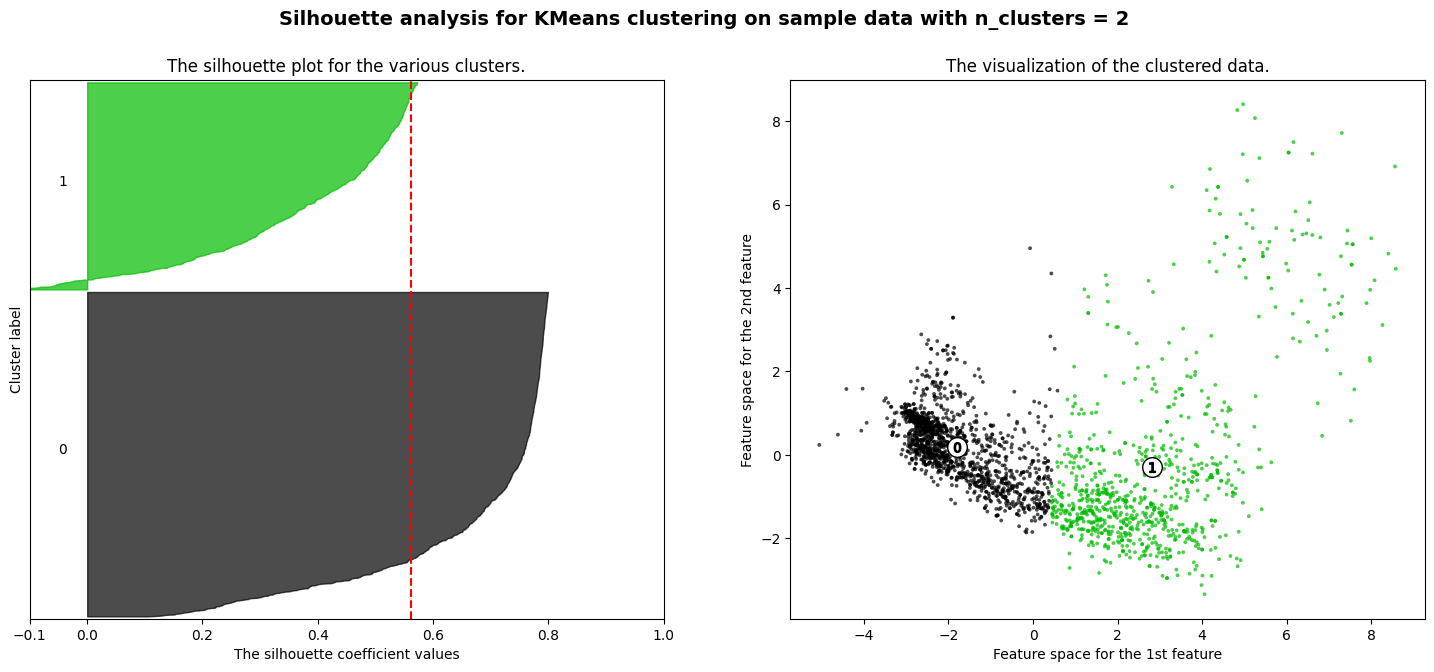

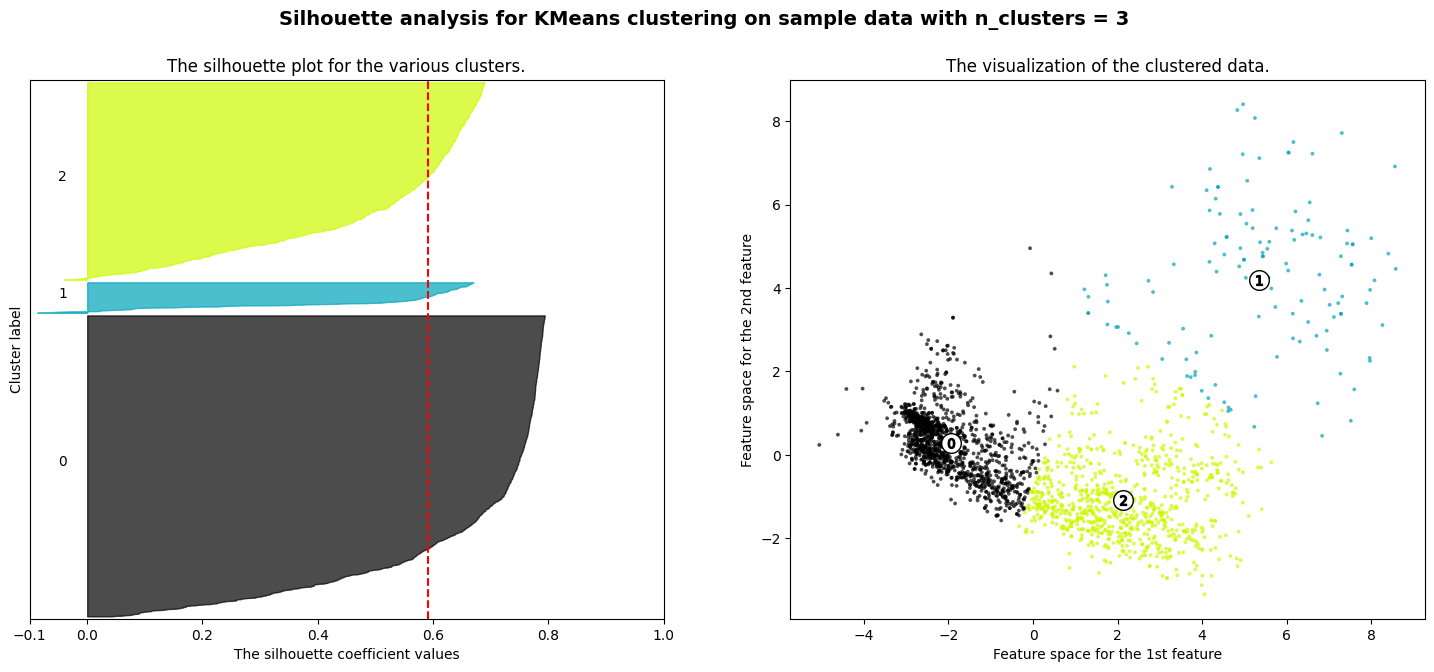

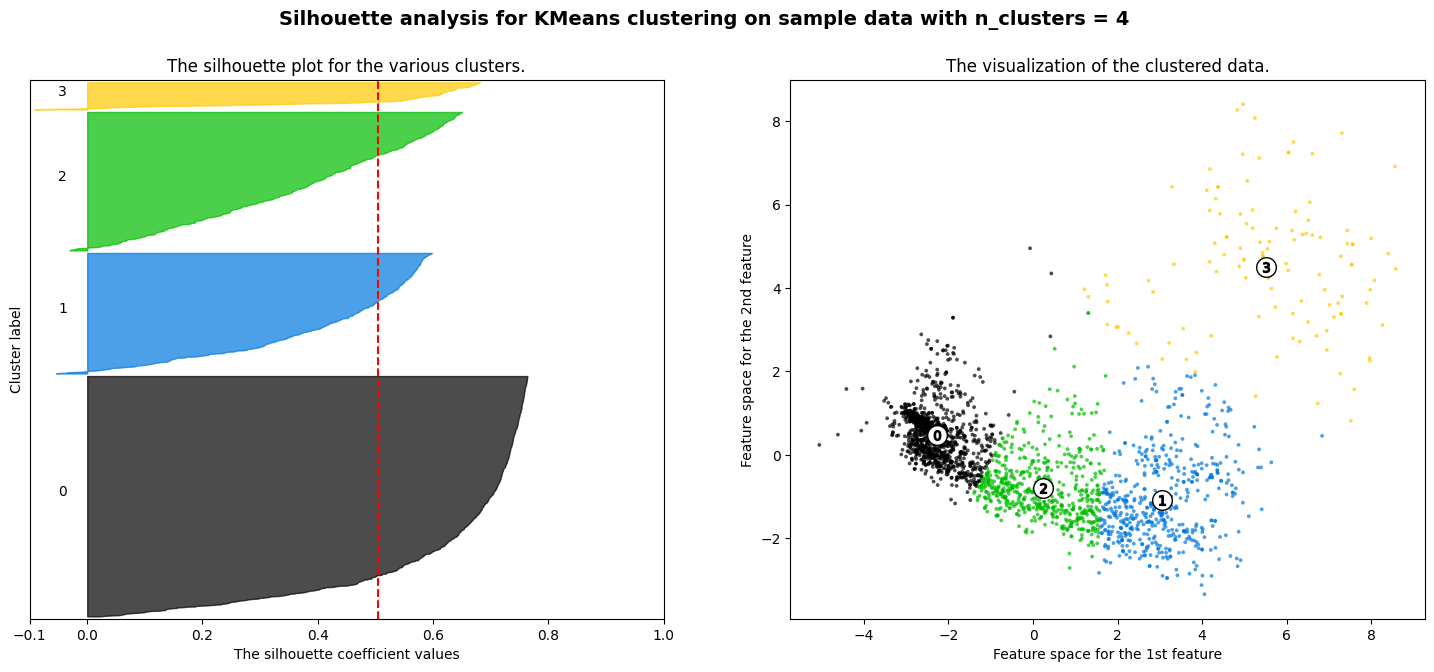

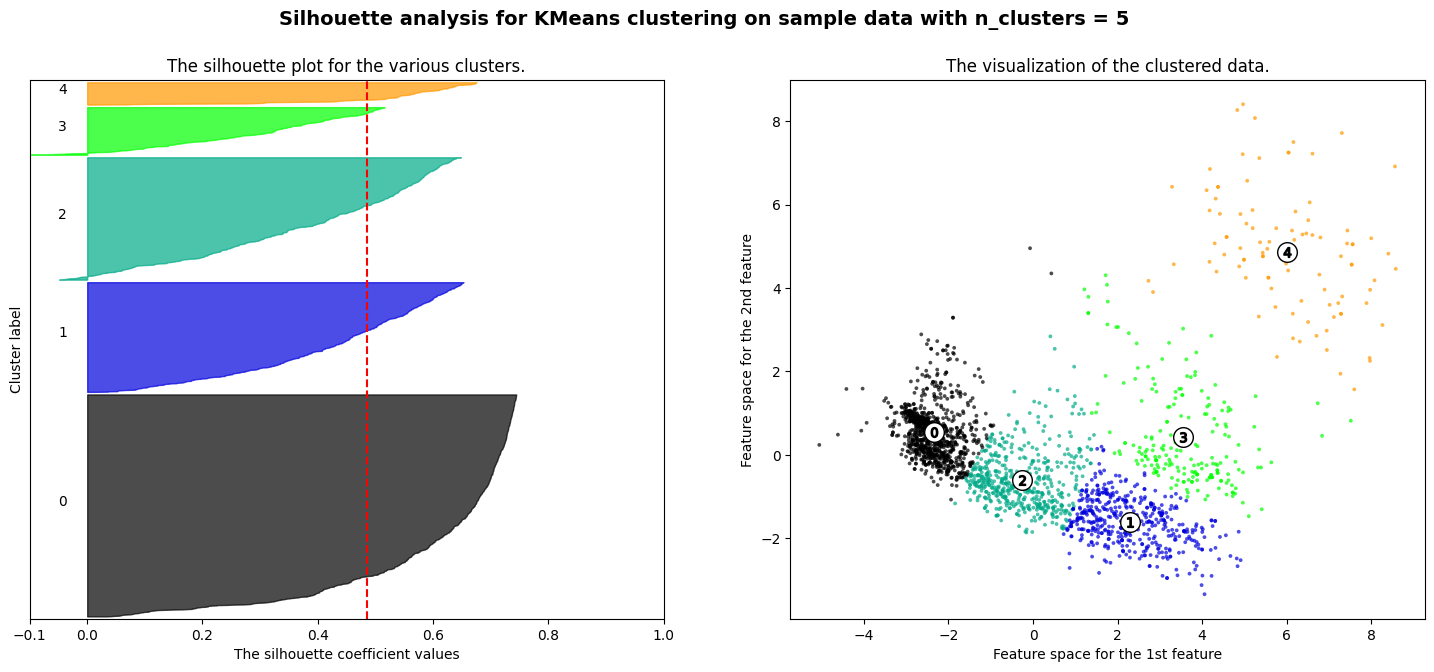

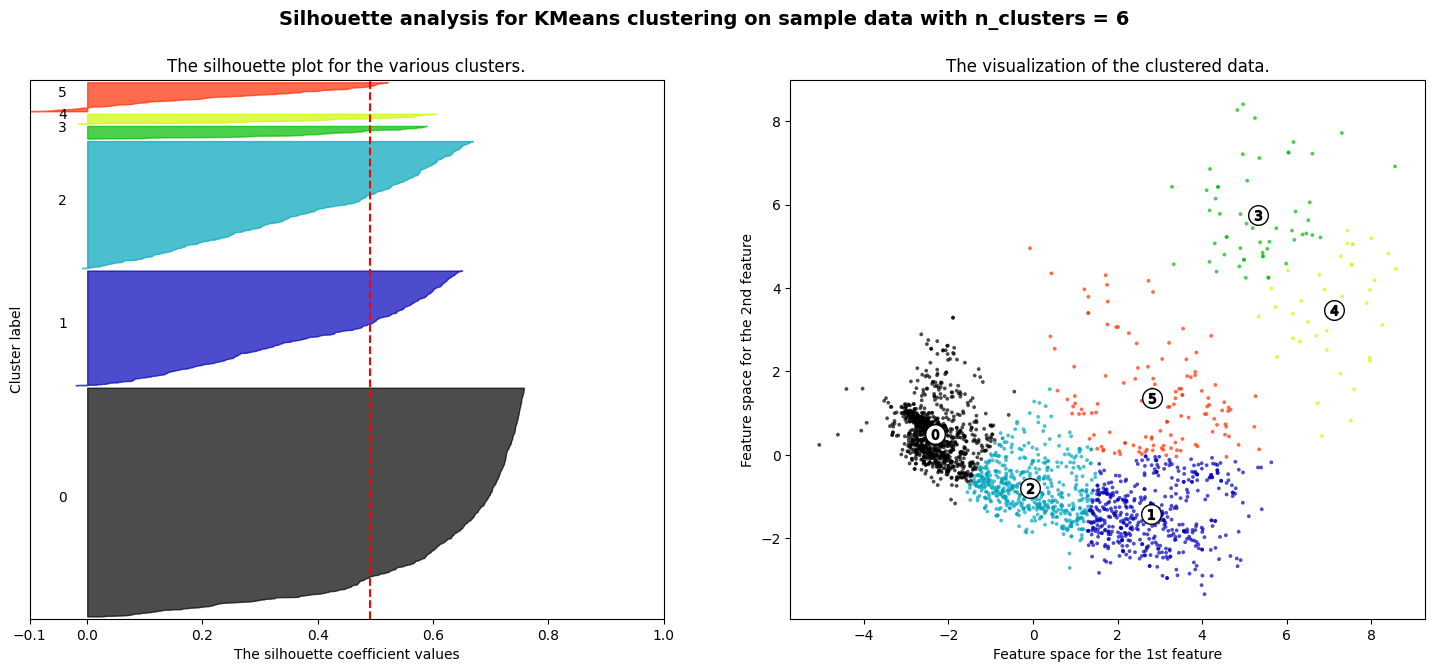

In [625]:
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm # colormaps
import numpy as np


X = X_pca

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 42 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=42)
    cluster_labels = clusterer.fit_predict(X)
    marketing[f'Cluster{n_clusters}'] = cluster_labels

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
        "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [626]:
marketing.drop('Cluster_5', axis=1)

ID  Year_Birth   Education   Income  Kidhome  Teenhome Dt_Customer  \
0      5524        1957  Graduation  58138.0        0         0  04-09-2012   
1      2174        1954  Graduation  46344.0        1         1  08-03-2014   
2      4141        1965  Graduation  71613.0        0         0  21-08-2013   
3      6182        1984  Graduation  26646.0        1         0  10-02-2014   
4      5324        1981         PhD  58293.0        1         0  19-01-2014   
...     ...         ...         ...      ...      ...       ...         ...   
2235  10870        1967  Graduation  61223.0        0         1  13-06-2013   
2236   4001        1946         PhD  64014.0        2         1  10-06-2014   
2237   7270        1981  Graduation  56981.0        0         0  25-01-2014   
2238   8235        1956      Master  69245.0        0         1  24-01-2014   
2239   9405        1954         PhD  52869.0        1         1  15-10-2012   

      Recency  MntWines  MntFruits  ...  AcceptedCmp1  AcceptedCmp2  Complain  \
0          58       635         88  ...             0             0         0   
1          38        11          1  ...             0             0         0   
2          26       426         49  ...             0             0         0   
3          26        11          4  ...             0             0         0   
4          94       173         43  ...             0             0         0   
...       ...       ...        ...  ...           ...           ...       ...   
2235       46       709         43  ...             0             0         0   
2236       56       406          0  ...             1             0         0   
2237       91       908         48  ...             0             0         0   
2238        8       428         30  ...             0             0         0   
2239       40        84          3  ...             0             0         0   

      Response  In_Relationship  Cluster2  Cluster3  Cluster4  Cluster5  \
0            1                0         1         2         1         3   
1            0                0         0         0         0         0   
2            0                1         1         2         2         1   
3            0                1         0         0         0         0   
4            0                1         0         0         2         2   
...        ...              ...       ...       ...       ...       ...   
2235         0                1         1         2         1         1   
2236         0                1         0         0         0         2   
2237         0                0         1         2         2         2   
2238         0                1         1         2         1         1   
2239         1                1         0         0         0         0   

      Cluster6  
0            1  
1            0  
2            1  
3            0  
4            2  
...        ...  
2235         1  
2236         0  
2237         5  
2238         1  
2239         0  

[2240 rows x 32 columns]

In [627]:
marketing.drop(['Cluster2','Cluster5','Cluster4','Cluster6'], axis=1, inplace=True)
for column in marketing.columns:
    if column != 'Cluster3':
        print(f"Statistics for {column} by Cluster3:")
        print(marketing[[column, 'Cluster3']].groupby('Cluster3').describe().T)
        print("\n")

Statistics for ID by Cluster3:
Cluster3             0             1             2
ID count   1274.000000    130.000000    836.000000
   mean    5584.741758   5481.684615   5620.643541
   std     3250.548739   3138.037233   3260.661646
   min        9.000000      1.000000      0.000000
   25%     2814.250000   2902.000000   2844.500000
   50%     5447.500000   5293.000000   5544.500000
   75%     8371.250000   8021.500000   8616.500000
   max    11191.000000  10872.000000  11176.000000


Statistics for Year_Birth by Cluster3:
Cluster3                    0            1            2
Year_Birth count  1274.000000   130.000000   836.000000
           mean   1970.302198  1970.969231  1966.188995
           std      11.432532    13.903286    12.040557
           min    1893.000000  1944.000000  1899.000000
           25%    1963.000000  1958.250000  1956.000000
           50%    1972.000000  1972.000000  1966.000000
           75%    1978.000000  1982.000000  1975.000000
           max    199

The silhouette score for 3 clusters gives the highest score of 0.591461309053842.
These 3 clusters seem to be well defined; there is a boundary seperating them, which was not seen in agglomerative clustering.
The clusters have the following differences
1) Cluster 0 is the largest with 1274 members; Cluster 2 is next with 836; and Cluster 1 is the smallest with 130 members
2) Graduation is the most common educational level across all clusters.
3) Cluster 1 has the highest average income, followed by Cluster 2, and then Cluster 0, which has the lowest average income and a significant standard deviation, indicating a wide income range within the cluster.
4) Recency averages are around 45 to 50 days across all clusters
5) Clusters 1 and 2 spend more on wines, meat, and fish products, indicating a potential interest in higher-end products or possibly higher disposable income. Cluster 0 has significantly lower spending in these categories
6) Cluster 0 seems to engage more with deals compared to the other clusters; Clusters 1 and 2 make more purchases through web and catalog channels than Cluster 0.
7) Cluster 1 has the highest response rate, followed by Cluster 2, and Cluster 0 has the lowest. This suggests that recent campaigns have been more effective with Cluster 1
8) The relationship doesn't vary throughout all three clusters.

To summarize, Cluster 1 seems to represent a more engaged customer base that responds well to marketing campaigns; Cluster 2 is similar but with slightly older demographics and less engagement with deals; and Cluster 0 appears to be the most price-sensitive and less engaged with marketing campaigns. Cluster 1 is high income customers, followed by Cluster 2, which shows the same trend with the engagement of the customer and shows that the company engages highly with customers with high incomes.

## Task 8 (10 points):
Show the results of a t-SNE analysis of the dataset.  Experiment with a variety of perplexity values and explain your final choice.  As with the previous questions, keep in mind that one of the goals of cluster analysis with this dataset is creating customer segments.  Can you define customer segments by examining the characteristics of each cluster?  How might you label the points in the t-SNE plot to show characteristics of each cluster?

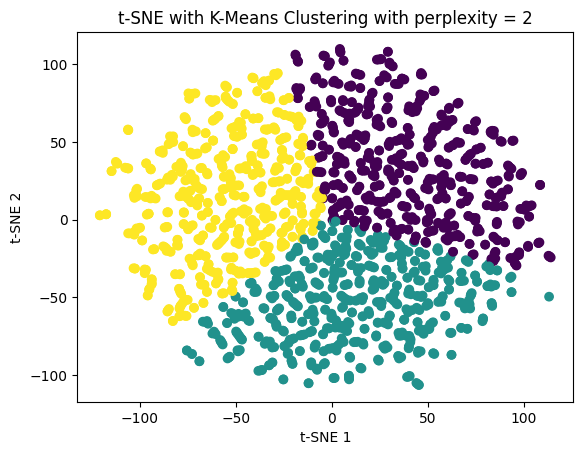

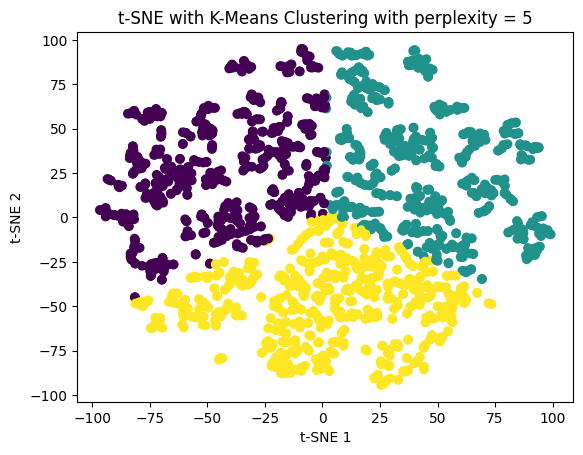

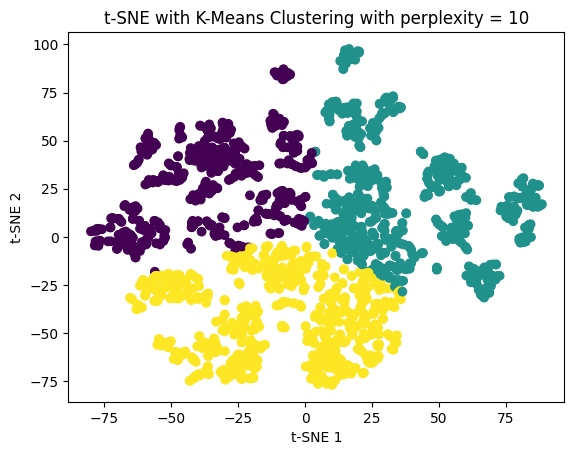

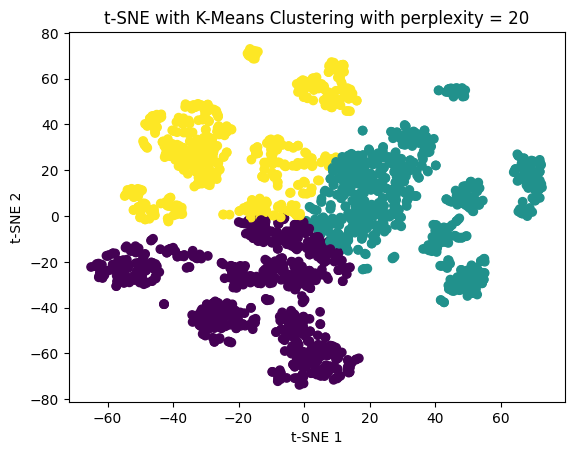

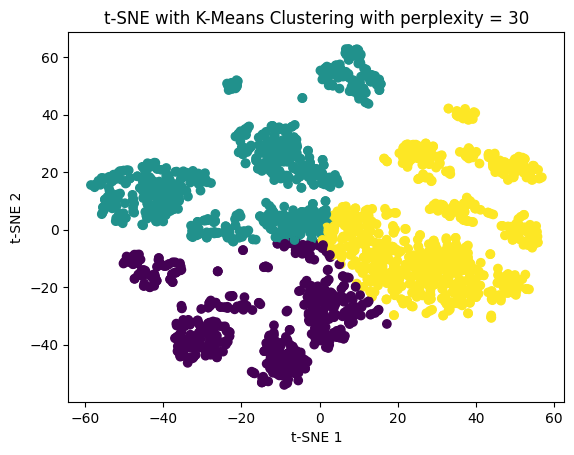

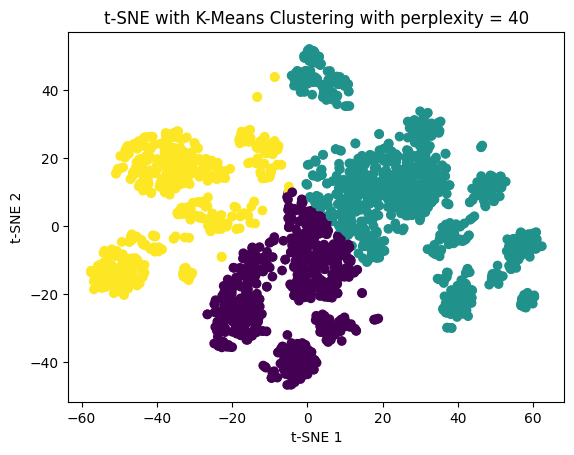

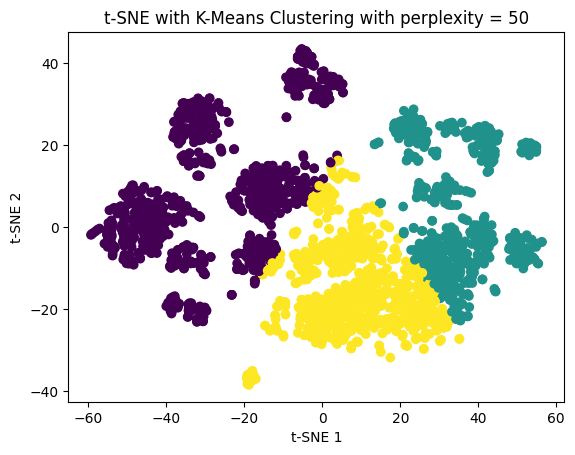

In [628]:
X_preprocessed = preprocessor.fit_transform(marketing)

perplexities = [2, 5, 10, 20, 30, 40, 50]

for perplexity in perplexities:
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    X_tsne = tsne.fit_transform(X_preprocessed)

    kmeans = KMeans(n_clusters=3, n_init="auto", random_state=42)
    cluster_labels = kmeans.fit_predict(X_tsne)

    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=cluster_labels, cmap='viridis')
    plt.title('t-SNE with K-Means Clustering with perplexity = ' + str(perplexity))
    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.show()


The perplexity value in t-SNE relates to how the algorithm balances attention between local and global aspects of your data. A low value of complexity helps in identifying more local structure in the data. As the value of perplexity increases, the clustering will show a more global structure of the data.

In this case,I have clustered them using k means clustering with 3 clusters. we can observe quite distinct clusters when the perplexity value is 30; when the perplexity is increased, there is a bit of overlap between the clusters. The choice should be whether the perplexity value is 30 or 40 in this case. I would choose a perplexity value of 30, as it is very balanced between the global and the local structure. In between t-SNE and PCA, both of them provides good results with k-means and which one is better depends on the application of this clustering.

I have used QuillBot for sentence and grammar checks. I have used ChatGpt for a few doubts I had. Most of the code is written by taking references from my last homework and in-class notebooks.<br>
I have attached screenshots of GPT prompts and their output below.<br>


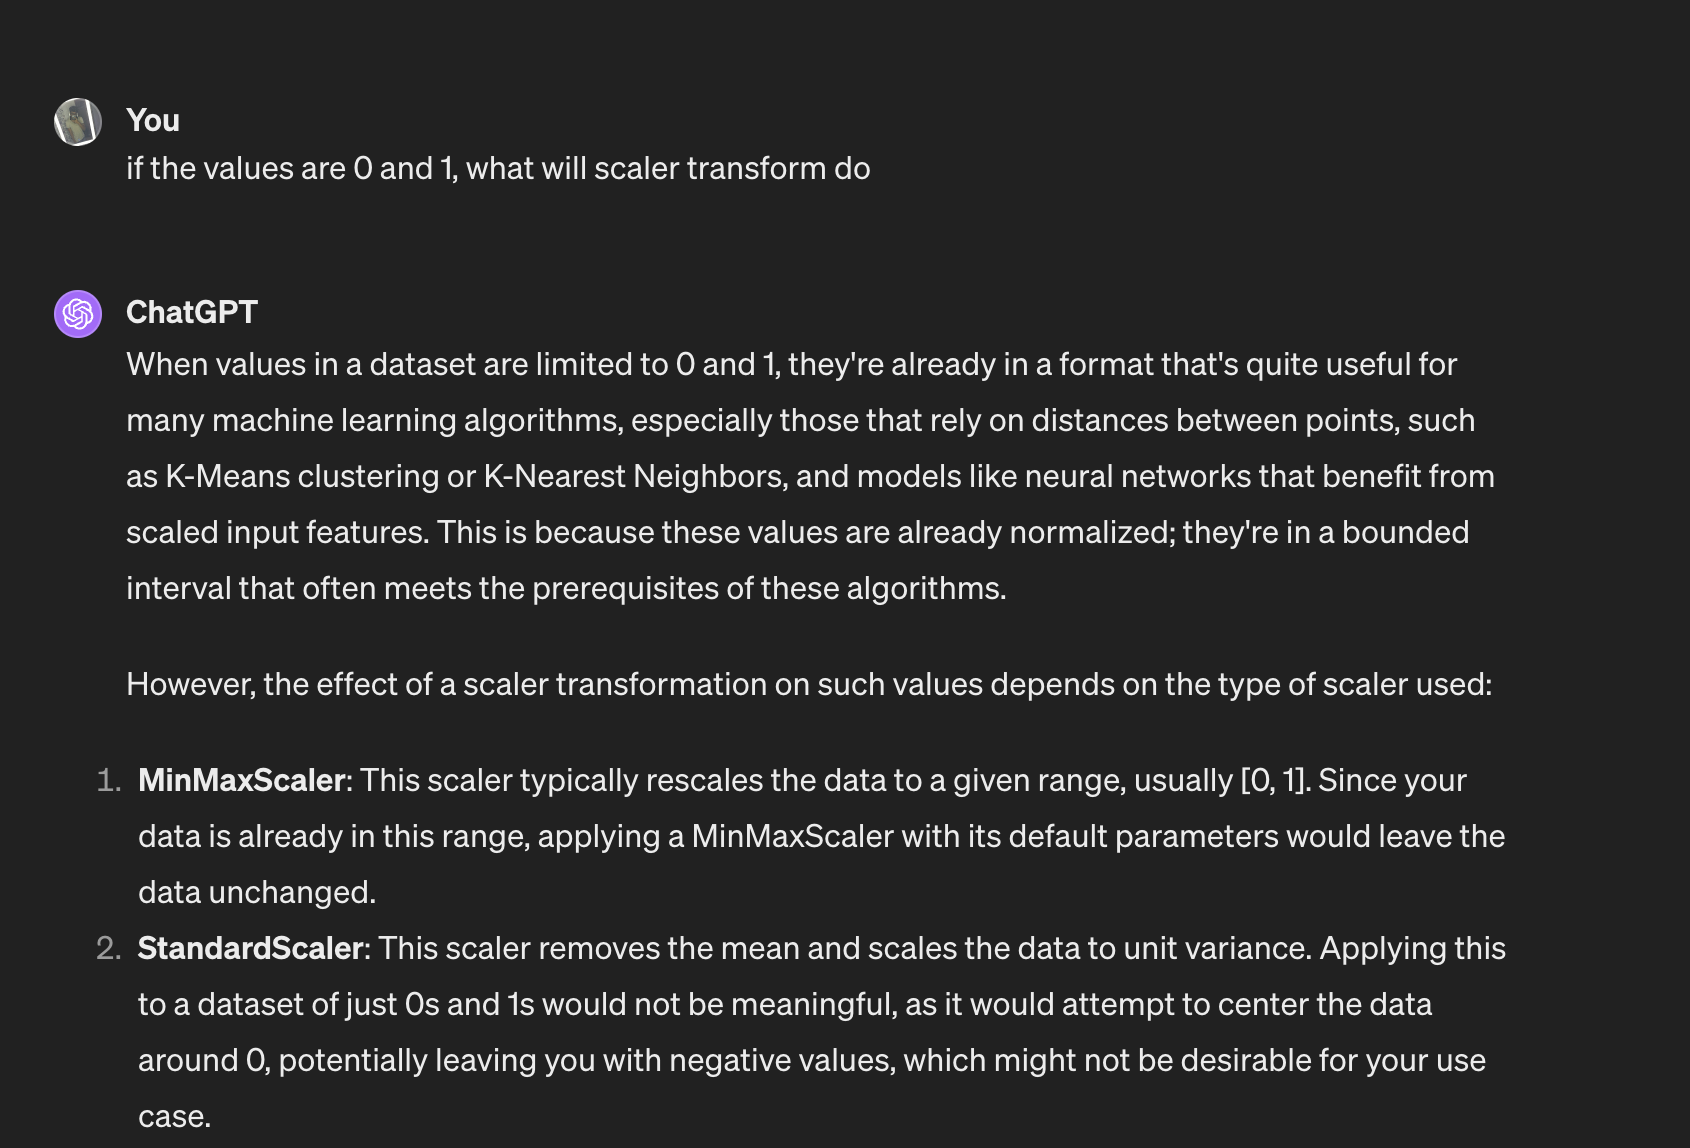

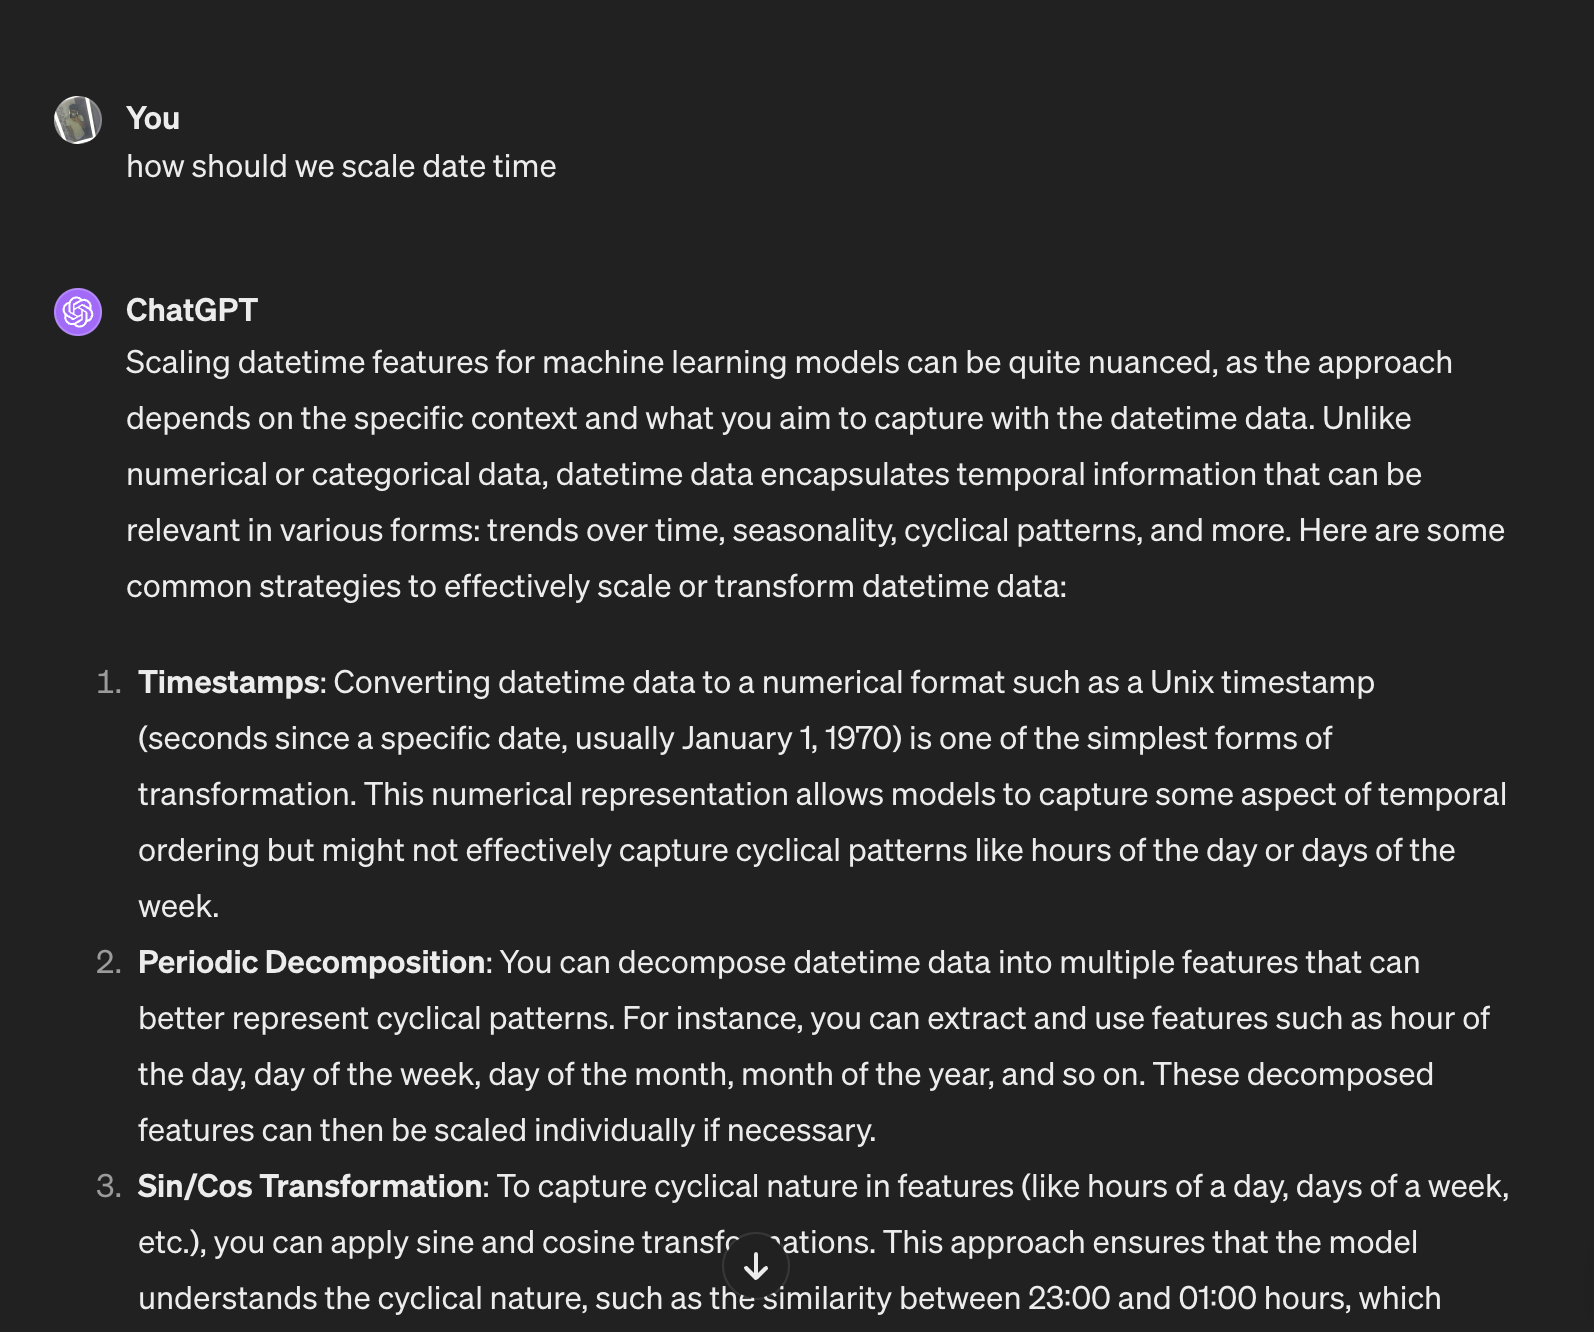

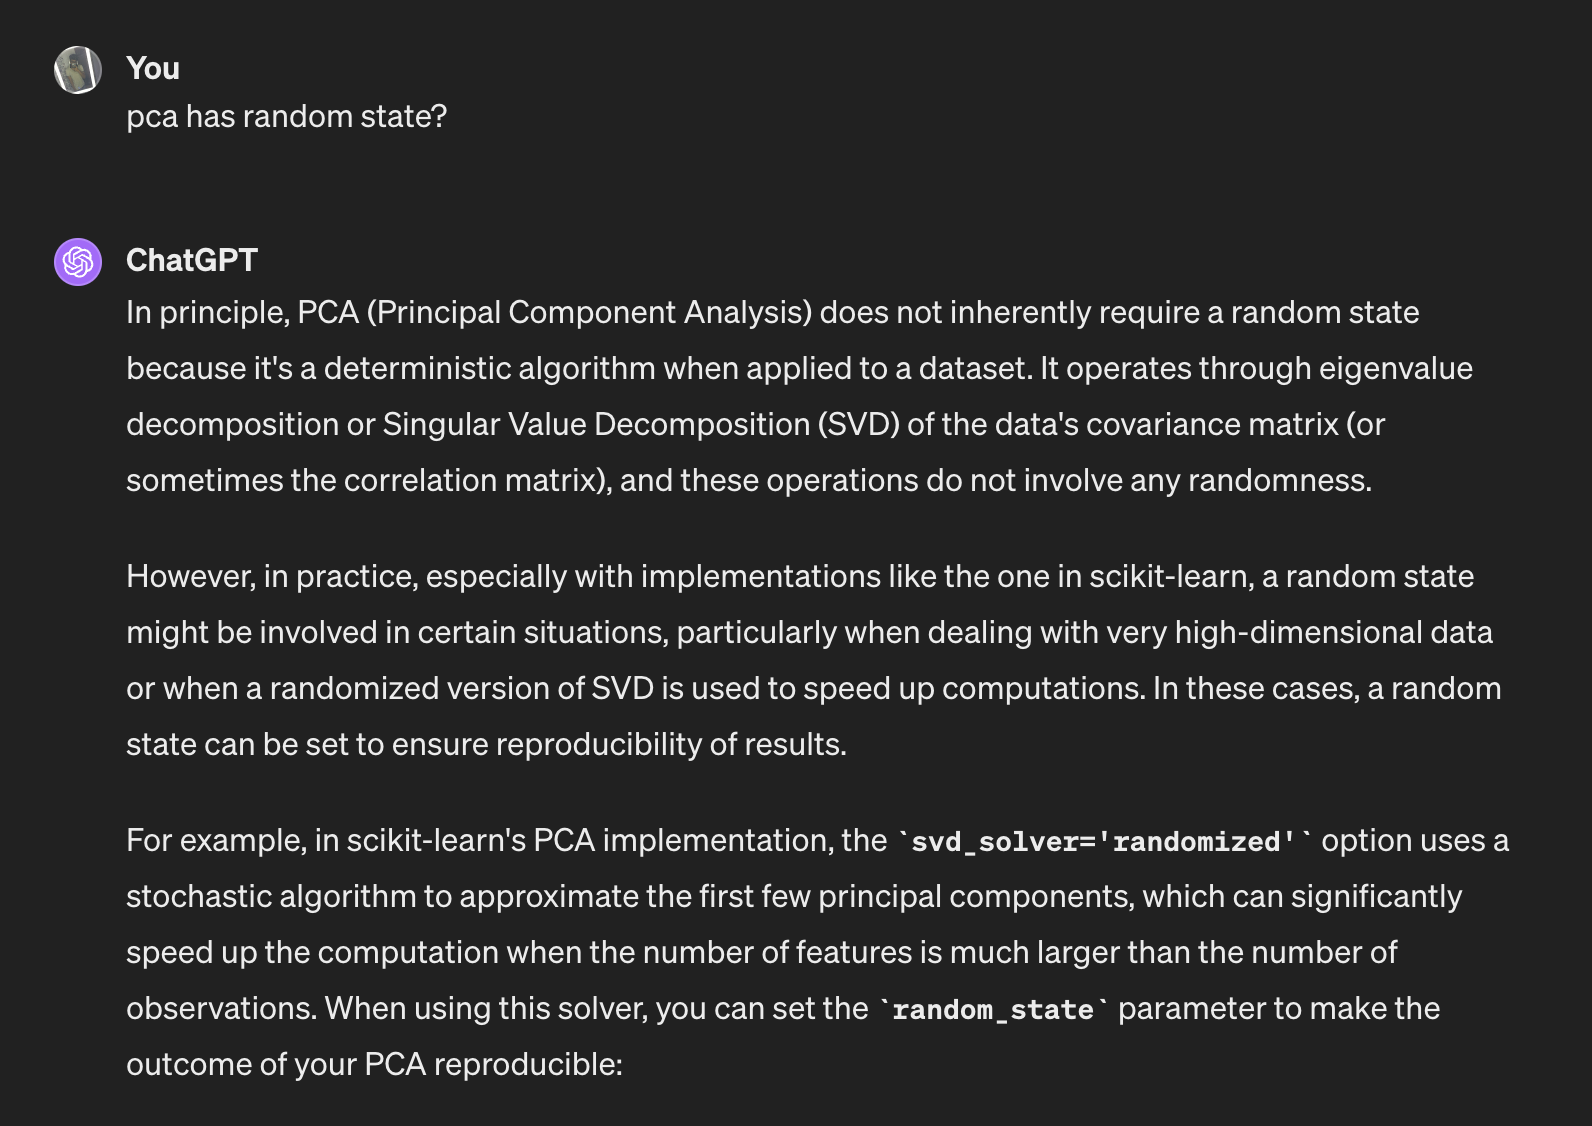

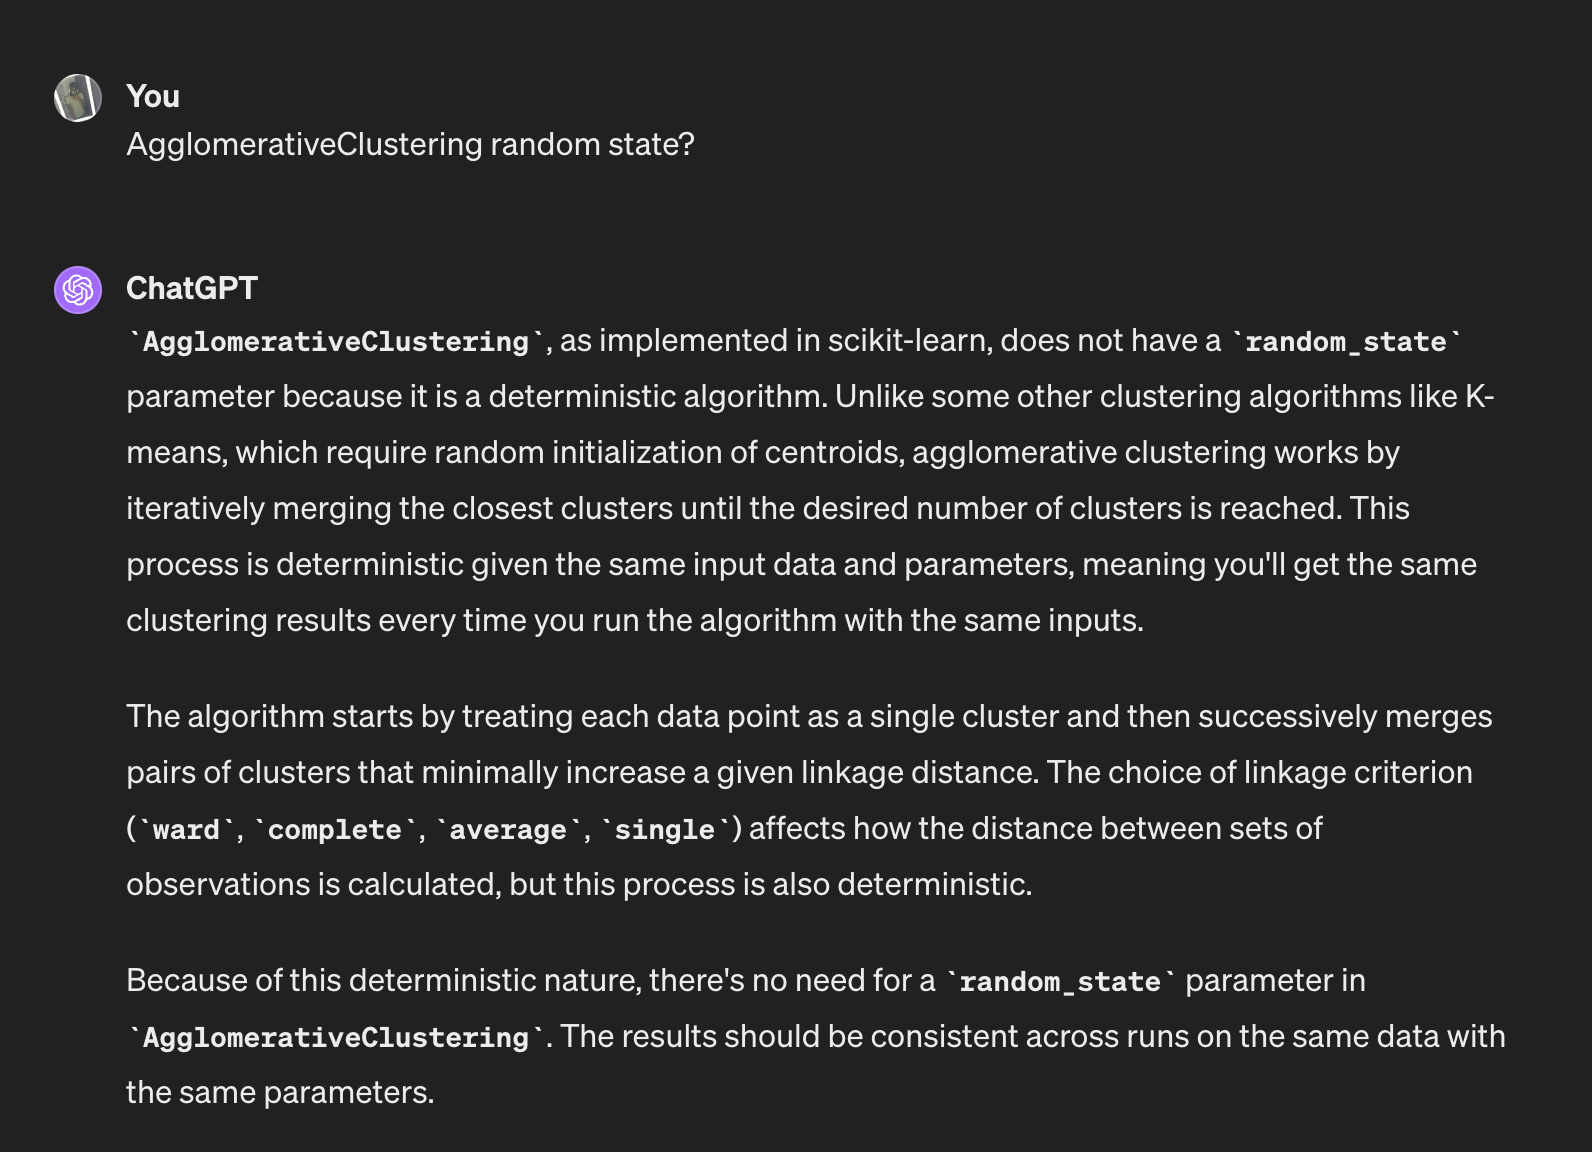

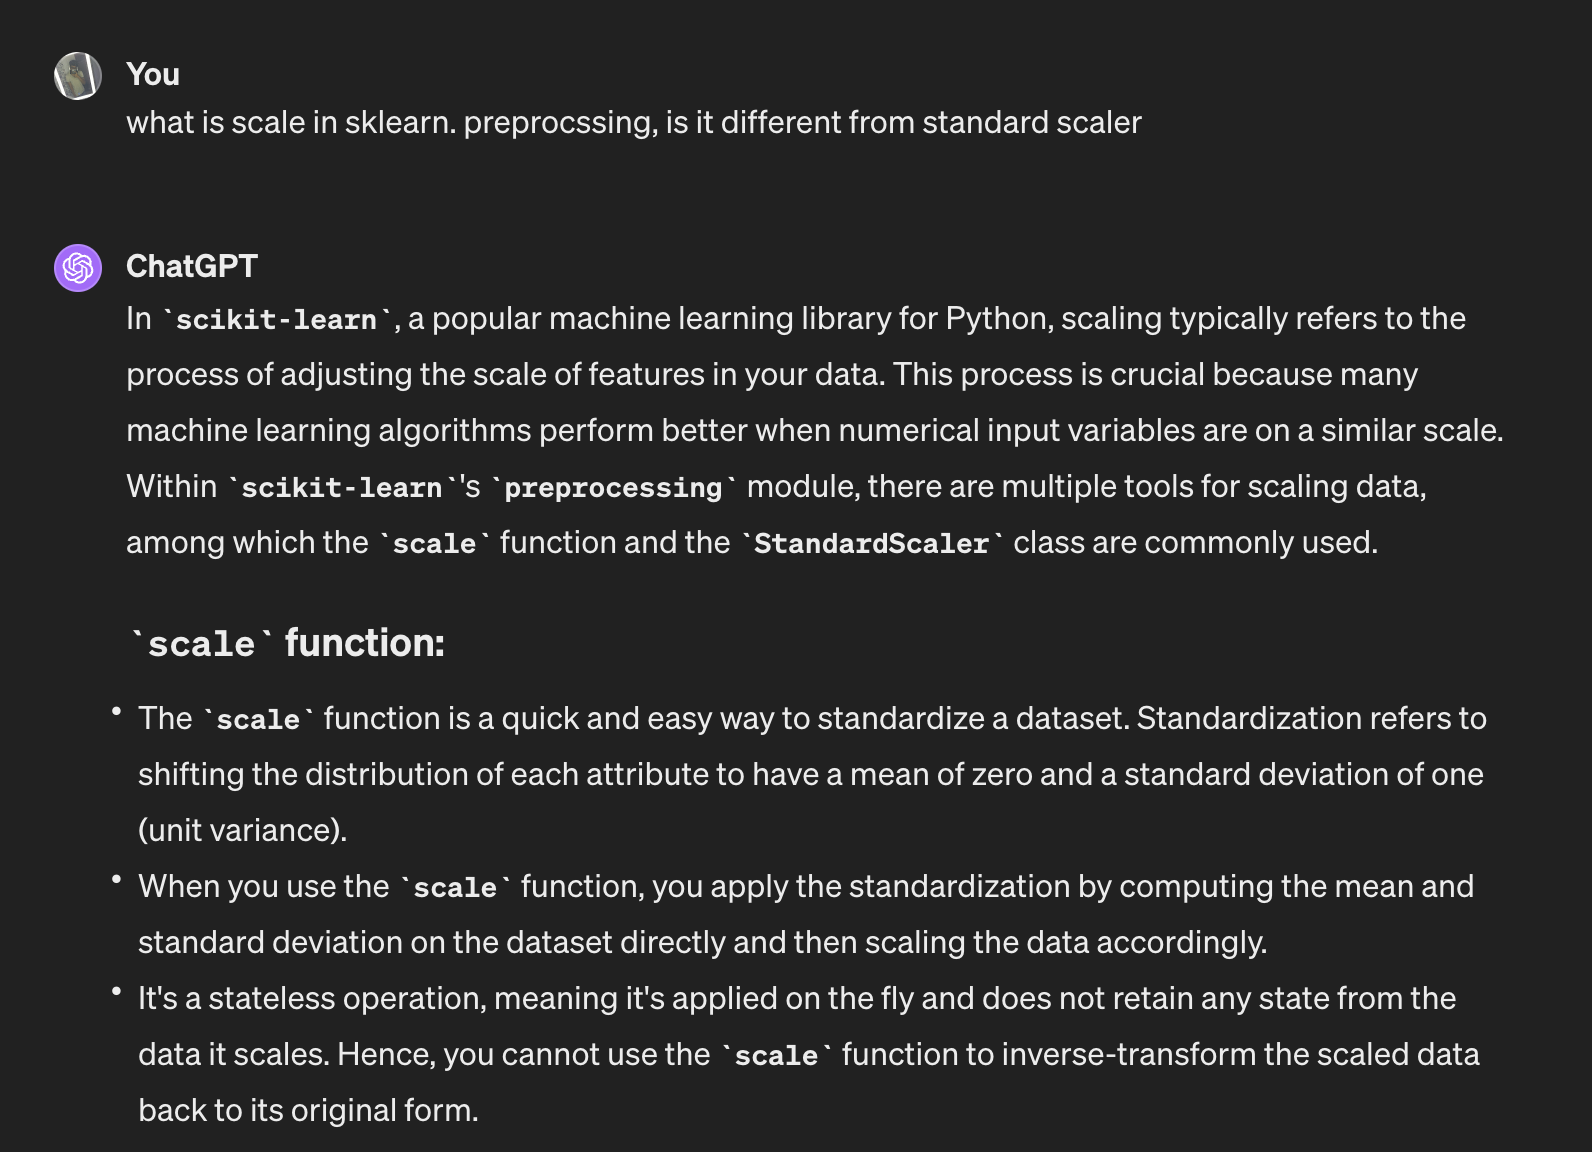

In [629]:
from PIL import Image
from IPython.display import display
for i in range(1,6):
    image = Image.open(f'/Users/sandeepjala/Documents/SI618/SI_618_WN_24_Files/homework/{i}.png')
    display(image)


# NOTE
We **strongly** recommend restarting your kernel and running your complete notebook from top to bottom
before submitting your work to Canvas in both HTML and IPYNB formats.